In [1]:
clinical<-read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/cn_emci_lmci_ad_clin_pseudotime.csv")
head(clinical)
dim(clinical)
colnames(clinical)
sum(!complete.cases(clinical))
clinical<-clinical[complete.cases(clinical),]

unique(clinical$RAVLT_learning)
unique(clinical$RAVLT_immediate)
unique(clinical$ADASQ4)

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,002_S_0295,CN,84.8,1,18,3,0,1,0,3.00,⋯,1,28,56,5,3,23.07690,12,300,0,0
2,002_S_0413,CN,76.3,0,16,3,0,0,0,3.33,⋯,1,29,52,6,5,41.66670,12,55,0,0
3,002_S_0559,CN,79.3,1,16,3,3,1,0,6.00,⋯,2,30,48,5,1,9.09091,15,53,0,0
4,002_S_0685,CN,89.6,0,16,3,0,0,0,3.67,⋯,3,30,36,5,3,33.33330,13,67,0,0
5,002_S_1261,CN,71.1,0,16,3,0,0,0,6.00,⋯,2,30,55,9,4,26.66670,17,71,0,0
6,002_S_1280,CN,70.7,0,14,3,0,1,0,3.00,⋯,2,30,37,6,5,50.00000,17,49,0,0


[1] 1274   21

[1] "PID"                   "SNF"                   "AGE"                  
 [4] "PTGENDER"              "PTEDUCAT"              "PTRACCAT"             
 [7] "PTMARRY"               "APOE4"                 "CDRSB"                
[10] "ADAS11"                "ADAS13"                "ADASQ4"               
[13] "MMSE"                  "RAVLT_immediate"       "RAVLT_learning"       
[16] "RAVLT_forgetting"      "RAVLT_perc_forgetting" "LDELTOTAL"            
[19] "TRABSCOR"              "FAQ"                   "SNFSUB"

[1] 80

[1]  5  6  9  8 10 11  3  7  4  2  1  0 -2 -1

[1] 56 52 48 36 55 37 44 51 49 34 33 54 62 38 58 50 41 24 39 57 20 29 45 47 53
[26] 25 40 42 43 31 35 61 67 32 27 64 46 63 23 66 68 65 30 18 59 69 28 60 22 26
[51] 71 16 17 19 21 14 11 15 13 12 10  7  8  5

[1]  1  2  3  4  0  5  7  6  8 10  9

In [2]:
clin_pheno <- c("RAVLT_learning","RAVLT_immediate","LDELTOTAL","MMSE","ADASQ4","RAVLT_perc_forgetting","ADAS13","ADAS11","FAQ","TRABSCOR","CDRSB","RAVLT_forgetting")
clinical_main = clinical[,c('PID','SNF','AGE','PTGENDER',clin_pheno)]
clinical_main[1:5,]

,PID,SNF,AGE,PTGENDER,RAVLT_learning,RAVLT_immediate,LDELTOTAL,MMSE,ADASQ4,RAVLT_perc_forgetting,ADAS13,ADAS11,FAQ,TRABSCOR,CDRSB,RAVLT_forgetting
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
1,002_S_0295,CN,84.8,1,5,56,12,28,1,23.07690,4.00,3.00,0,300,0,3
2,002_S_0413,CN,76.3,0,6,52,12,29,1,41.66670,4.33,3.33,0,55,0,5
3,002_S_0559,CN,79.3,1,5,48,15,30,2,9.09091,8.00,6.00,0,53,0,1
4,002_S_0685,CN,89.6,0,5,36,13,30,3,33.33330,6.67,3.67,0,67,0,3
5,002_S_1261,CN,71.1,0,9,55,17,30,2,26.66670,8.00,6.00,0,71,0,4


SNF,RAVLT_learning,RAVLT_immediate,LDELTOTAL,MMSE,ADASQ4,RAVLT_perc_forgetting,ADAS13,ADAS11,FAQ,TRABSCOR,CDRSB,RAVLT_forgetting
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD,1.895623,23.34680,1.316498,23.30640,8.612795,89.26065,29.108956,18.876633,13.0134680,196.74074,4.36700337,4.636364
CN,5.932673,45.23960,13.318812,29.08515,2.766337,33.74175,9.026337,5.850099,0.1306931,82.25347,0.02970297,3.580198
emcisubtype1,4.761905,36.78095,8.619048,28.20000,4.400000,50.59868,13.438095,8.390476,2.1904762,101.20000,1.32380952,4.390476
emcisubtype2,5.700000,43.12222,9.177778,28.42222,3.888889,41.68466,11.811111,7.477778,1.5666667,92.78889,1.15000000,4.155556
lmcisubtype1,3.469880,30.98795,4.132530,27.44578,5.819277,68.93543,17.345542,10.610602,4.0481928,114.00000,1.56024096,4.903614
lmcisubtype2,3.649123,34.44737,4.219298,27.53509,5.964912,61.64861,17.704737,11.081930,3.6842105,117.75439,1.70175439,4.508772


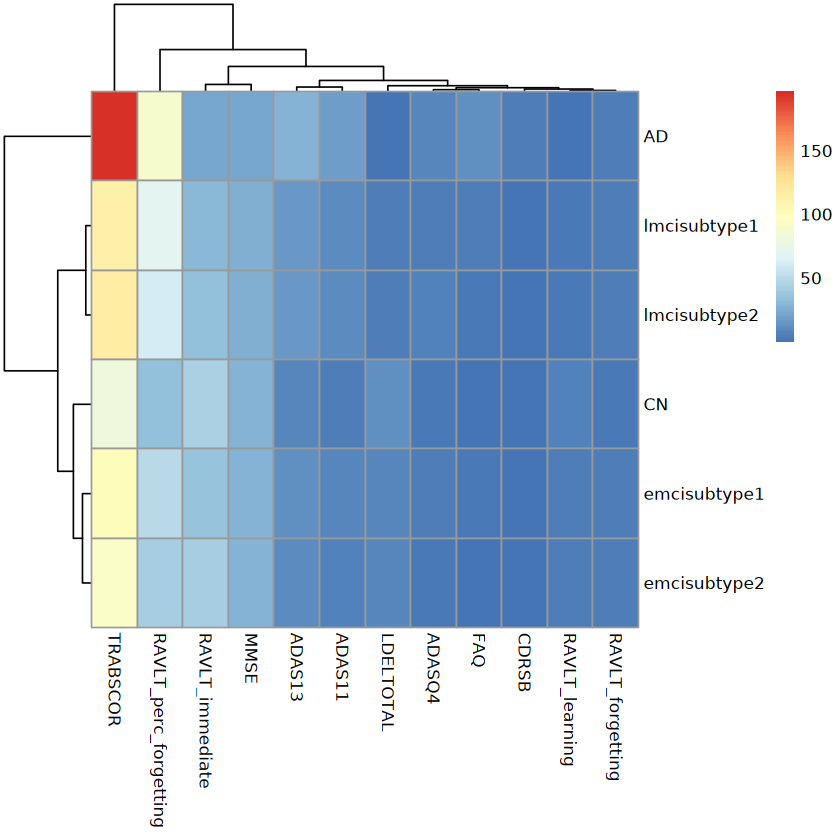

In [5]:
library(dplyr)
library(tidyr)
library(pheatmap)
clinical_summary <- clinical_main %>%
  group_by(SNF) %>%
  summarise(
    across(
      all_of(clin_pheno),
      list(mean = ~mean(.x, na.rm = TRUE)),.names = "{.col}"
           #sd   = ~sd(.x, na.rm = TRUE)),
    )
  )
clinical_summary

clinical_summary_vals = as.data.frame(clinical_summary[,-c(1)])
rownames(clinical_summary_vals) = clinical_summary$SNF
desired_order <- c(
  "CN","emcisubtype1","emcisubtype2",
  "lmcisubtype1", "lmcisubtype2", "AD"
)
clinical_summary_vals <- clinical_summary_vals[desired_order, ]
pheatmap(clinical_summary_vals)


In [6]:


clinical_summary_vals = as.data.frame(clinical_summary[,-c(1)])
rownames(clinical_summary_vals) = clinical_summary$SNF
clinical_summary_vals <- clinical_summary_vals[desired_order, ]

'dendrogram' with 2 branches and 6 members total, at height 132.8751 

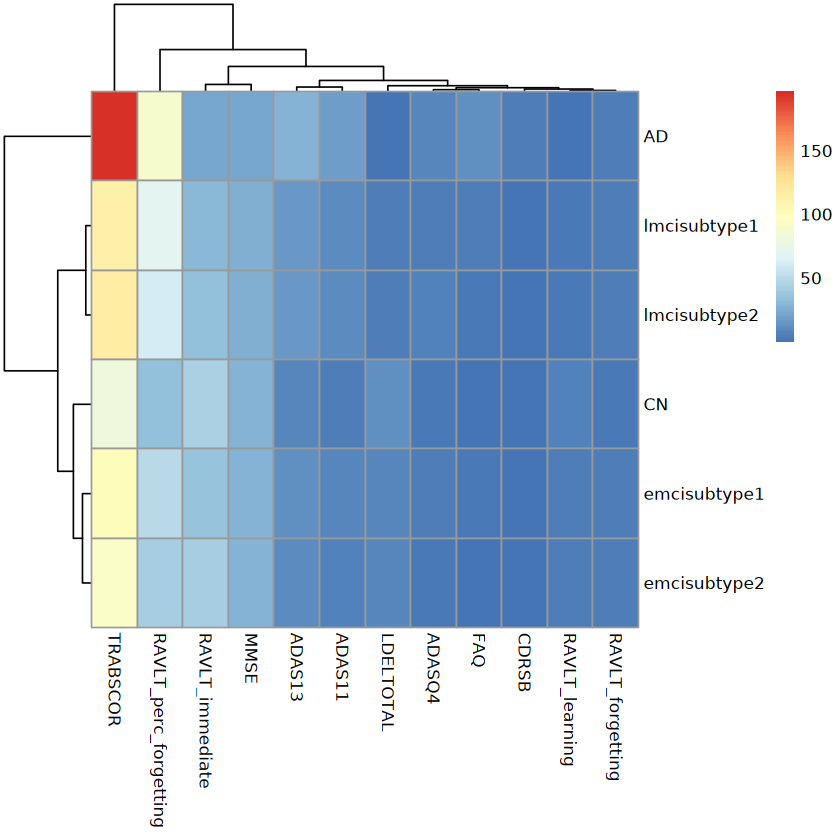

In [7]:
plot_dendro = pheatmap(clinical_summary_vals)
dend <- as.dendrogram(plot_dendro$tree_row)
dend

In [9]:
new_order <- c("CN", "emcisubtype1", "emcisubtype2",
               "lmcisubtype1", "lmcisubtype2", "AD")

dend_rot <- dendextend::rotate(as.dendrogram(ph$tree_row), order = new_order)

phtmap <- pheatmap::pheatmap(zadj_summary_vals)
col_dend <- dendextend::rotate(as.dendrogram(ph$tree_row), order = new_order)
pheatmap(zadj_summary_vals, cluster_rows =as.hclust(col_dend))

ERROR: Error in eval(expr, envir, enclos): object 'zadj_summary_vals' not found


Warning message:
“Setting row names on a tibble is deprecated.”


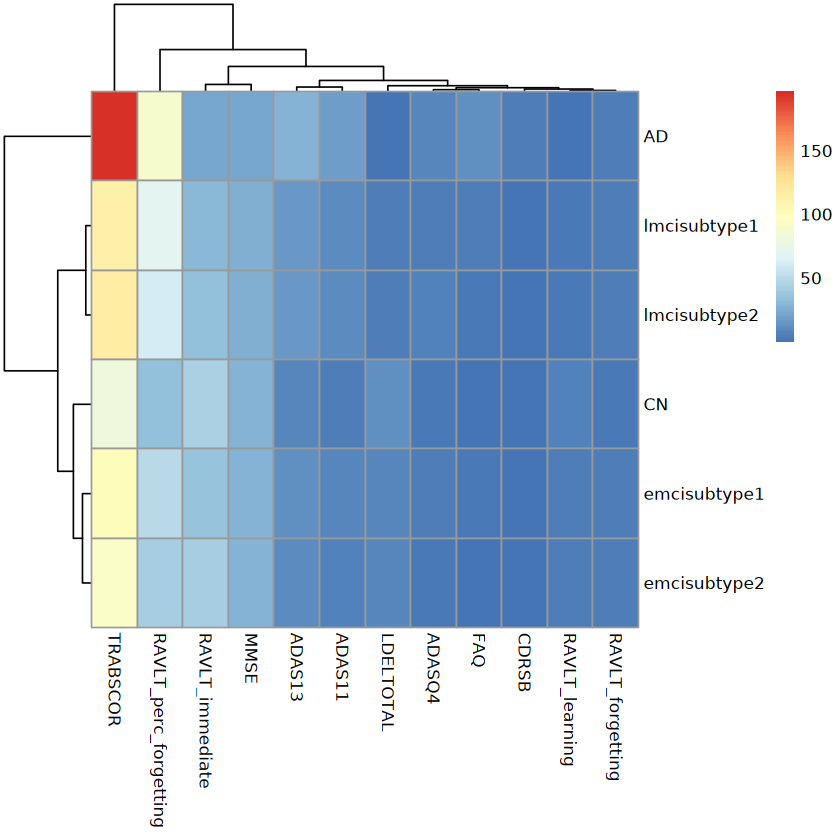

In [15]:


# leaves you want to reorder
target_order <- c("CN", "emcisubtype1", "emcisubtype2")

# reorder only the subtree containing these labels
dend <- reorder(dend, wts = as.numeric(factor(labels(dend) %in% target_order)))


In [4]:
table(clinical$SNF)


          AD           CN emcisubtype1 emcisubtype2 lmcisubtype1 lmcisubtype2 
         297          505          105           90           83          114 

In [2]:
a1 = read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/all_emci_metab_hmdb_lilikoi.csv')
a2 = read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/all_lmci_metab_hmdb_lilikoi.csv')
a1$Group = paste0('emci',a1$Label)
a2$Group = paste0('lmci',a2$Label)
adni_meta2 = as.data.frame(rbind(a1,a2[,colnames(a1)]))
adni_meta2[1:5,]
table(adni_meta2$Group)

,PID,Label,HMDB00619,HMDB00518,HMDB00626,HMDB00138,HMDB02579,HMDB00631,HMDB00698,HMDB00708,⋯,HMDB00684,HMDB02005,HMDB01414,HMDB00271,HMDB00259,HMDB01257,HMDB00725,HMDB00251,HMDB03334,Group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,002_S_2043,subtype2,-0.8792540,-0.1875521,0.75295340,0.2873668,0.36887949,0.8987022,-0.1861431,1.34433793,⋯,0.65318011,-0.001591773,0.2660862,-0.3234940,0.2548153,-0.01215726,0.05930034,0.58227772,0.42117862,emcisubtype2
2,002_S_2073,subtype2,-0.7398908,-1.9193004,0.26471396,-0.1371964,-0.28091724,0.9132637,1.4012887,-1.31044838,⋯,0.40088668,0.090254429,0.2543823,-1.3694655,-1.6442721,0.13060886,-1.02277553,0.30431180,0.15804754,emcisubtype2
3,002_S_4237,subtype2,-0.4702125,-0.2459582,-0.19755277,-0.2836390,-1.02422483,-0.5758655,-0.3173270,-0.15177014,⋯,0.34455055,0.151504709,0.2660862,0.9543504,1.4532168,-0.27628254,0.98994982,0.39002685,1.09790028,emcisubtype2
4,002_S_4447,subtype2,1.7135542,0.7814702,-0.07764682,0.7715306,-0.08503491,-0.2164579,-0.4190556,0.07319015,⋯,0.01865553,-0.061884568,1.1381778,-0.4532766,0.5706850,0.68387265,-0.66788995,0.62484678,0.53576623,emcisubtype2
5,002_S_4473,subtype2,1.6958716,0.9579071,-0.75617773,0.0594835,0.12395451,-0.7558922,0.6629781,0.06781828,⋯,0.20419387,-0.503800488,0.0292733,0.9497441,0.8186699,-0.34806072,-0.09256254,-0.09862253,0.08554218,emcisubtype2



emcisubtype1 emcisubtype2 lmcisubtype1 lmcisubtype2 
         108           93           85          115 

In [3]:
clinicl_all = clinical[,c('PID','SNF')]
mci_all = adni_meta2[,c('PID','Group')]
clinicl_all[1:3,]
mci_all[1:3,]

,PID,SNF
,<chr>,<chr>
1,002_S_0295,CN
2,002_S_0413,CN
3,002_S_0559,CN


,PID,Group
,<chr>,<chr>
1,002_S_2043,emcisubtype2
2,002_S_2073,emcisubtype2
3,002_S_4237,emcisubtype2


In [4]:
EMCI_1_PTID = read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/EMCI_1_names.csv")
EMCI_2_PTID = read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/EMCI_2_names.csv")
EMCI_1_PTID$x%in%mci_all[mci_all$Group=='emcisubtype1','PID']
EMCI_2_PTID$x%in%mci_all[mci_all$Group=='emcisubtype2','PID']

LMCI_1_PTID = read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/LMCI_1_names.csv")
LMCI_2_PTID = read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/LMCI_2_names.csv")
LMCI_1_PTID$x%in%mci_all[mci_all$Group=='lmcisubtype1','PID']
LMCI_2_PTID$x%in%mci_all[mci_all$Group=='lmcisubtype2','PID']

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[91] TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [5]:
merge_check = merge(clinicl_all,mci_all,by.x='PID',by.y='PID')
merge_check = merge(clinicl_all,mci_all,by.x='PID',by.y='PID')
merge_check = merge(clinicl_all,mci_all,by.x='PID',by.y='PID')
sum(merge_check$SNF==merge_check$Group)

[1] 392

In [6]:
merge_check = merge(clinical2,mci_all,by.x='PID',by.y='PID')
sum(merge_check$SNF==merge_check$Group)

ERROR: Error in eval(expr, envir, enclos): object 'clinical2' not found


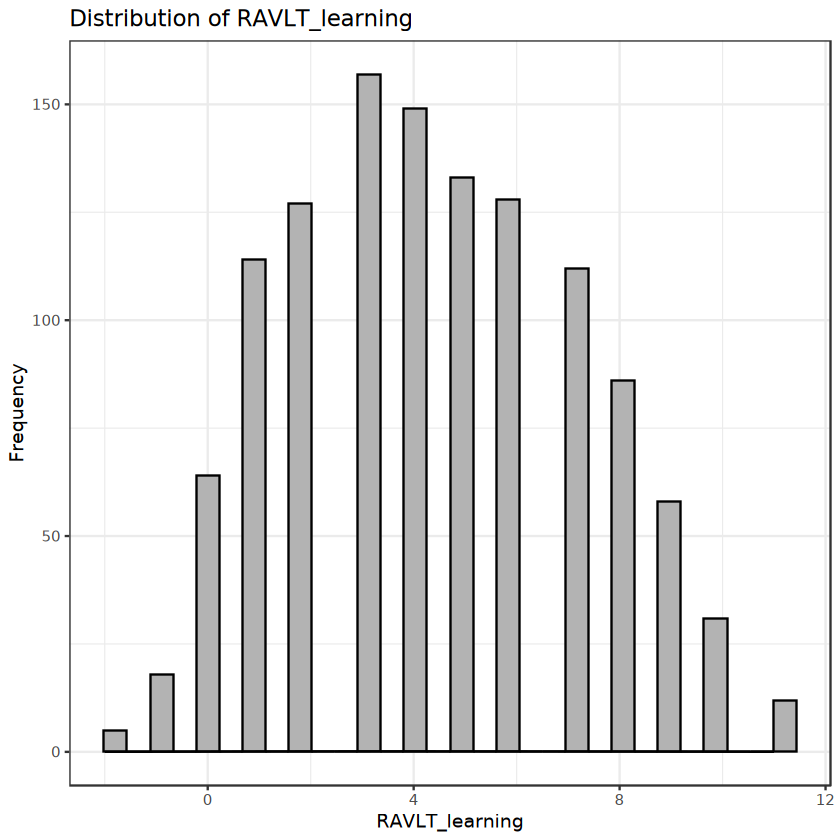

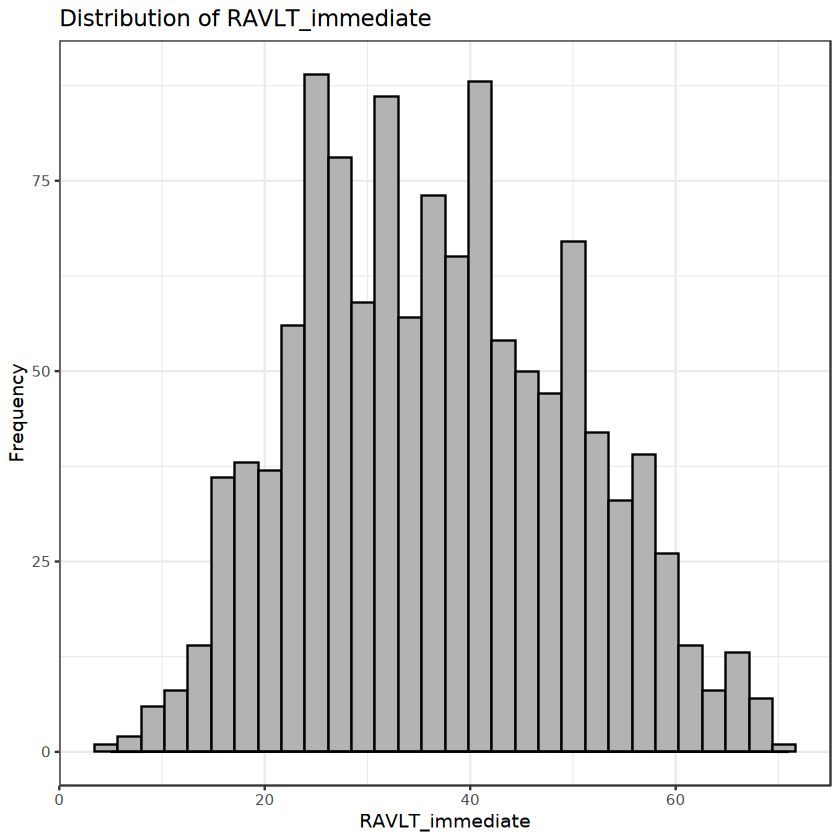

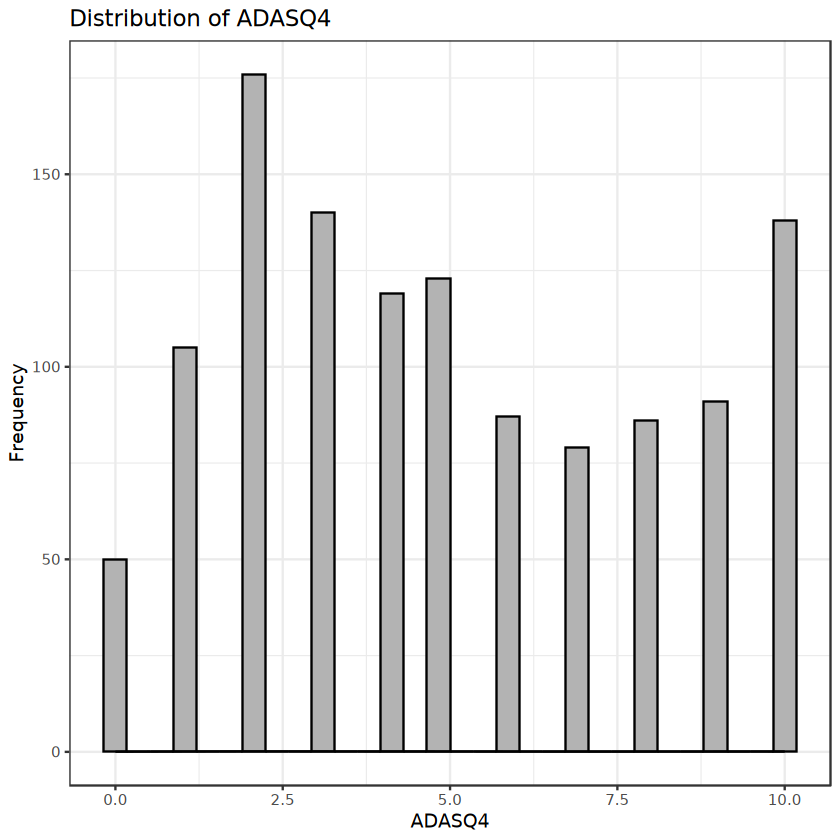

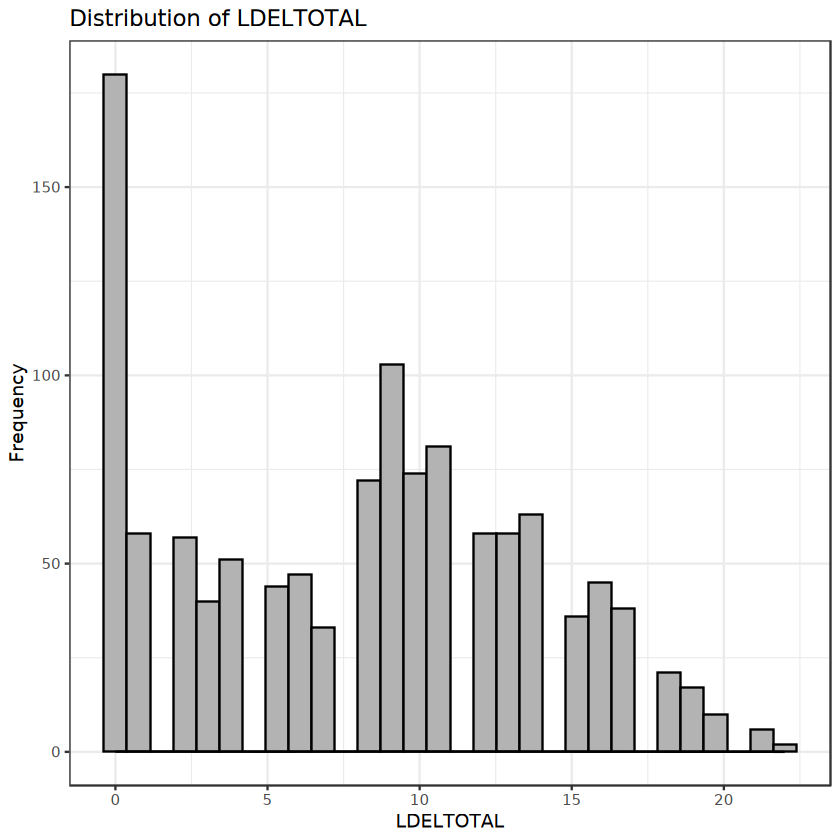

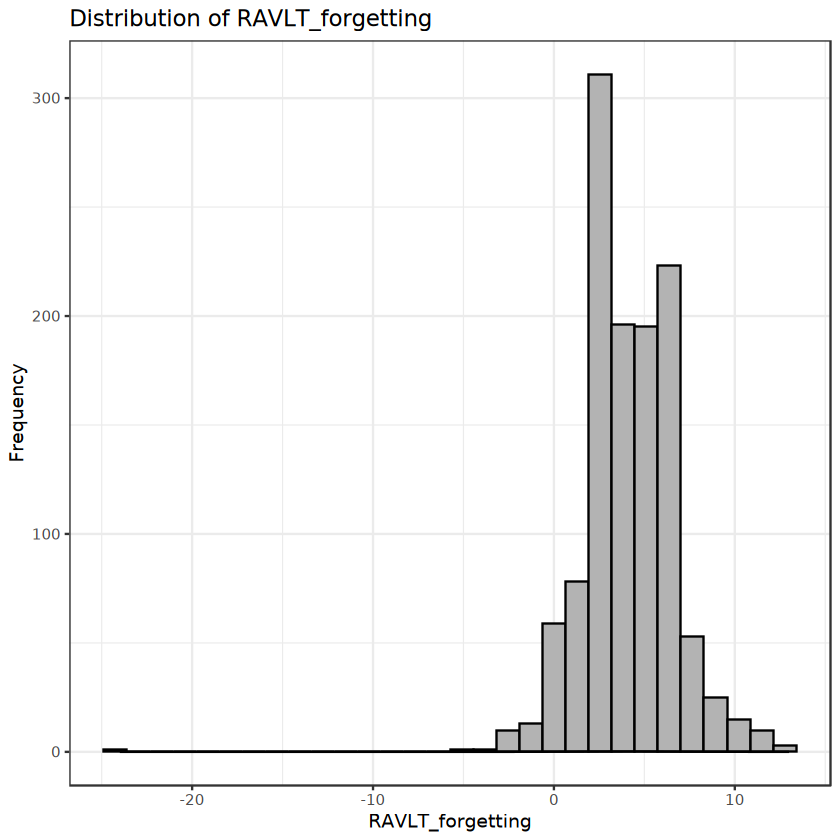

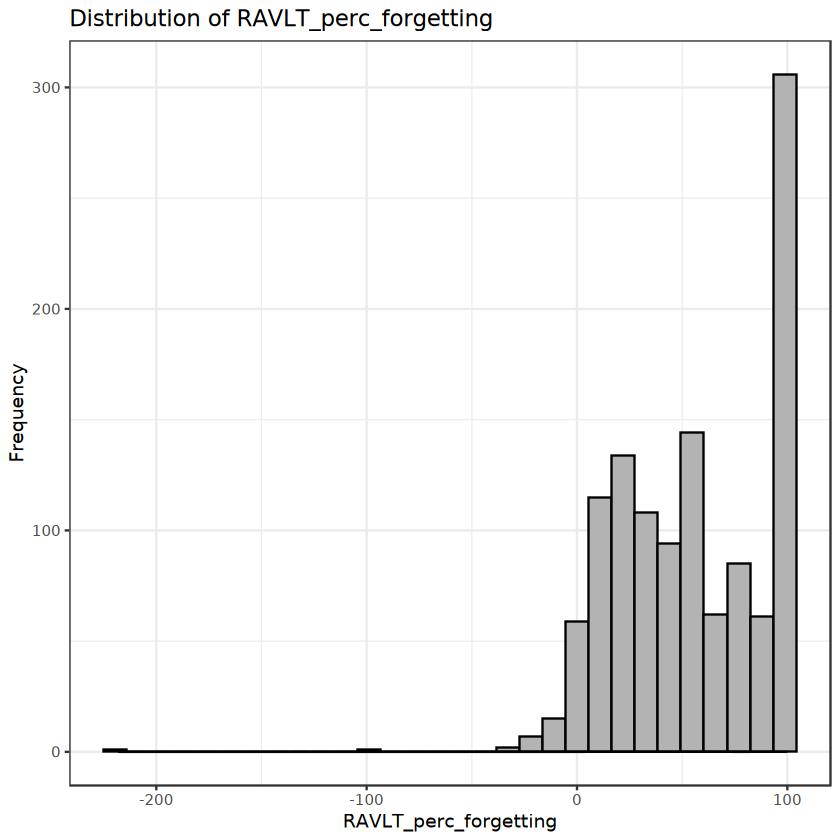

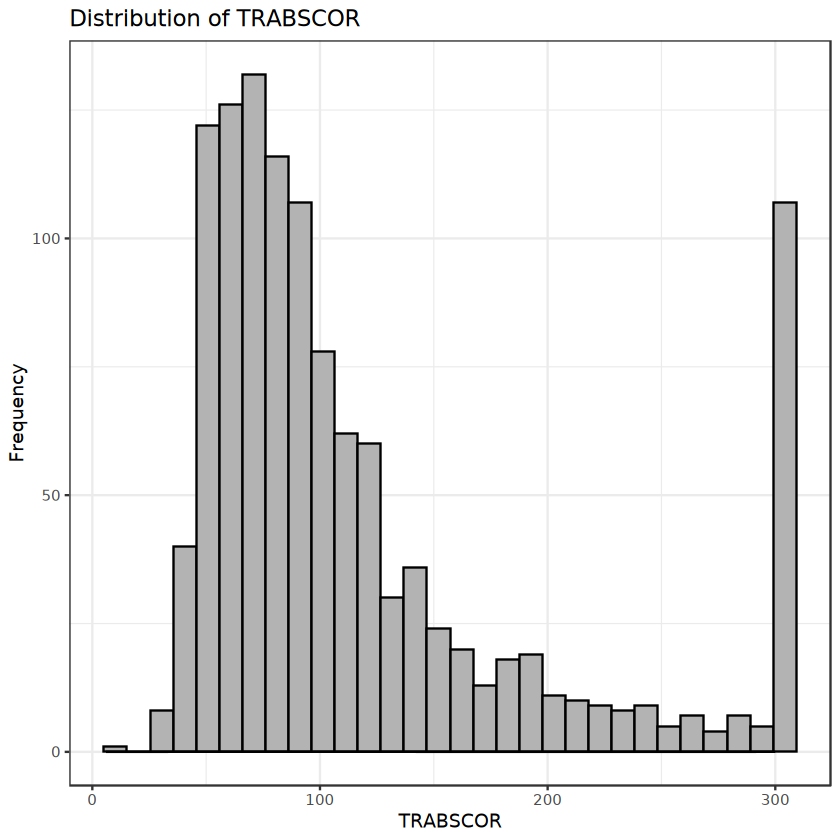

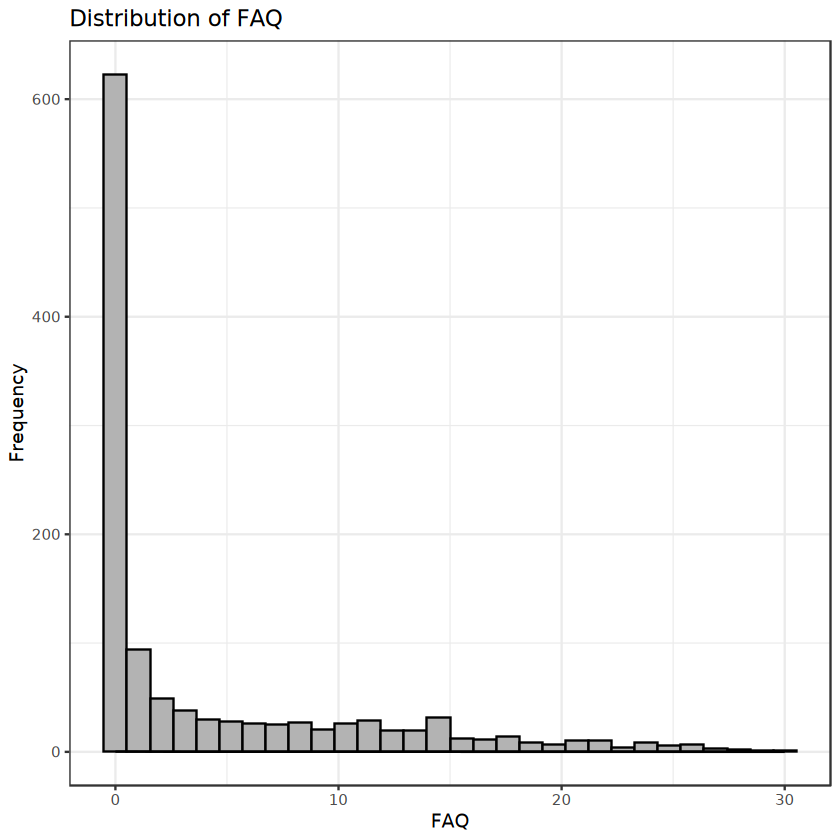

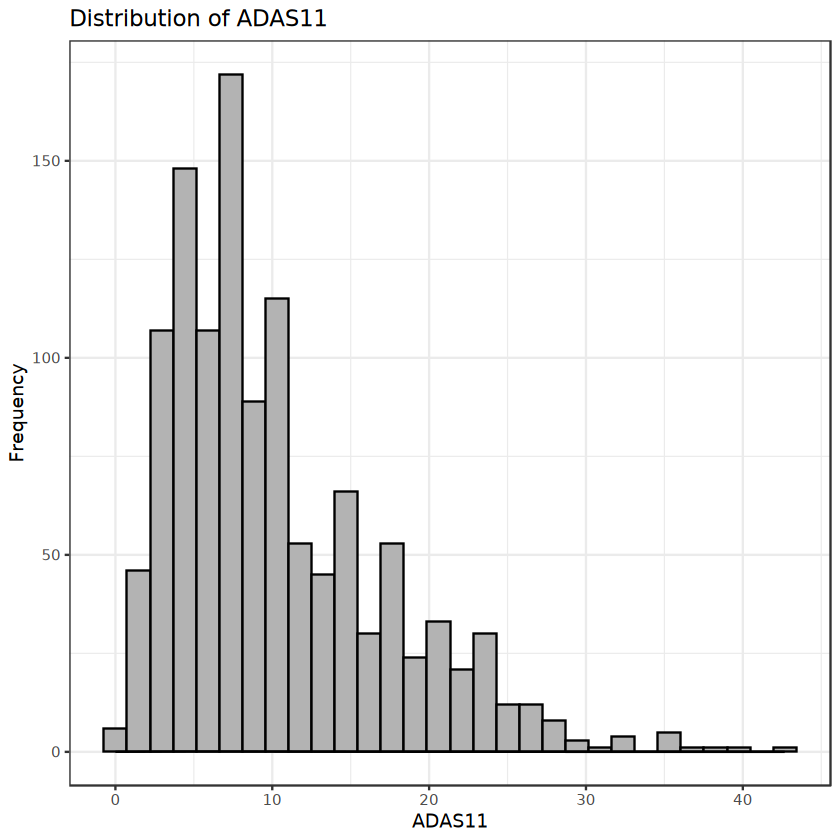

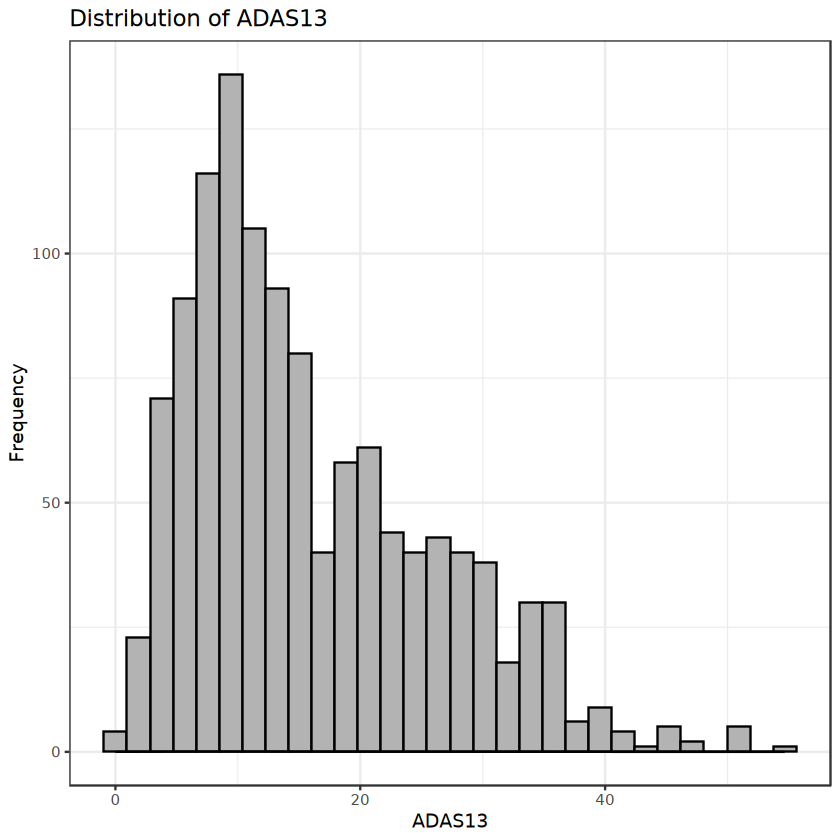

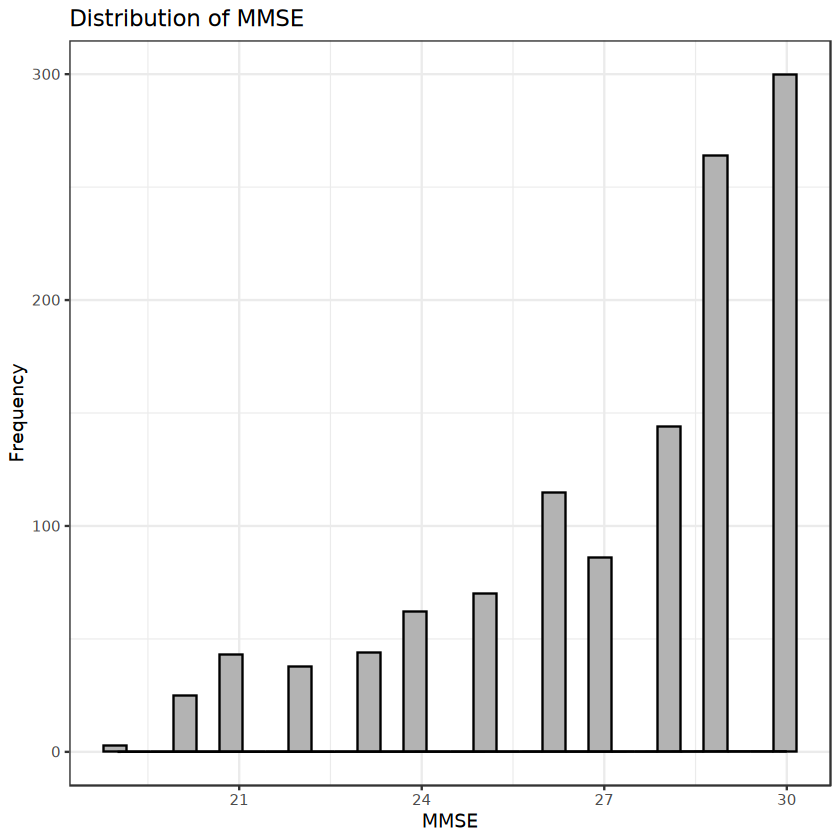

In [7]:
library(ggplot2)

vars <- c("RAVLT_learning", "RAVLT_immediate", "ADASQ4","LDELTOTAL","RAVLT_forgetting","RAVLT_perc_forgetting","TRABSCOR","FAQ","ADAS11","ADAS13","MMSE")

for (v in vars) {
  p <- ggplot(clinical, aes(x = .data[[v]])) +
    geom_histogram(bins = 30, fill = "grey70", color = "black") +
    geom_density(alpha = 0.3) +
    labs(title = paste("Distribution of", v),
         x = v, y = "Frequency") +
    theme_bw()
  
  print(p)
}


In [10]:
clinical[1:5,]

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,002_S_0295,CN,84.8,1,18,3,0,1,0,3.00,⋯,1,28,56,5,3,23.07690,12,300,0,0
2,002_S_0413,CN,76.3,0,16,3,0,0,0,3.33,⋯,1,29,52,6,5,41.66670,12,55,0,0
3,002_S_0559,CN,79.3,1,16,3,3,1,0,6.00,⋯,2,30,48,5,1,9.09091,15,53,0,0
4,002_S_0685,CN,89.6,0,16,3,0,0,0,3.67,⋯,3,30,36,5,3,33.33330,13,67,0,0
5,002_S_1261,CN,71.1,0,16,3,0,0,0,6.00,⋯,2,30,55,9,4,26.66670,17,71,0,0


In [30]:
library(ggplot2)
library(ggpubr)
cog <- c('CDRSB','ADAS11','ADAS13','ADASQ4','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting','LDELTOTAL','TRABSCOR','FAQ')
#cog = c('AGE','PTGENDER')
clinical2 <- clinical[complete.cases(clinical[,cog]), ]

clinical2[["SNF"]]<-factor(clinical2[["SNF"]],levels= c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD"))

levs<-levels(clinical2[["SNF"]])
pair<-combn(levs,2,simplify=FALSE)

clinical2[1:5,]

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,002_S_0295,CN,84.8,1,18,3,0,1,0,3.00,⋯,1,28,56,5,3,23.07690,12,300,0,0
2,002_S_0413,CN,76.3,0,16,3,0,0,0,3.33,⋯,1,29,52,6,5,41.66670,12,55,0,0
3,002_S_0559,CN,79.3,1,16,3,3,1,0,6.00,⋯,2,30,48,5,1,9.09091,15,53,0,0
4,002_S_0685,CN,89.6,0,16,3,0,0,0,3.67,⋯,3,30,36,5,3,33.33330,13,67,0,0
5,002_S_1261,CN,71.1,0,16,3,0,0,0,6.00,⋯,2,30,55,9,4,26.66670,17,71,0,0


In [29]:
adnimerge=read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/az_omics_new/az_omics/Shared/Shared/ADNI_project/Data Processing/Other Data/ADNIMERGE.csv')
adnimerge_bl = adnimerge[adnimerge$VISCODE=='bl',]
dim(adnimerge_bl)

[1] 2276  113

In [12]:
adnimerge_bl_common = adnimerge_bl[adnimerge_bl$PTID%in%clinical2$PID,]

In [13]:
library(dplyr)
library(stringr)

In [14]:
clinical[1:5,]

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,002_S_0295,CN,84.8,1,18,3,0,1,0,3.00,⋯,1,28,56,5,3,23.07690,12,300,0,0
2,002_S_0413,CN,76.3,0,16,3,0,0,0,3.33,⋯,1,29,52,6,5,41.66670,12,55,0,0
3,002_S_0559,CN,79.3,1,16,3,3,1,0,6.00,⋯,2,30,48,5,1,9.09091,15,53,0,0
4,002_S_0685,CN,89.6,0,16,3,0,0,0,3.67,⋯,3,30,36,5,3,33.33330,13,67,0,0
5,002_S_1261,CN,71.1,0,16,3,0,0,0,6.00,⋯,2,30,55,9,4,26.66670,17,71,0,0


In [31]:
#'FDG_bl','PIB_bl','AV45_bl',
adni_age_gender = clinical[,c('PID','SNF','AGE','PTGENDER')]
adni_age_gender = adni_age_gender[complete.cases(adni_age_gender),]
adni_age_gender$SNF <- factor(
  adni_age_gender$SNF,
  levels = c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD")
)
adni_age_gender <- adni_age_gender %>%
  select(PID, SNF, PTGENDER,AGE) %>%
  mutate(
    PTGENDER = factor(PTGENDER, labels = c("Female", "Male"))
  )

adni_age_gender[1:5,]

,PID,SNF,PTGENDER,AGE
,<chr>,<fct>,<fct>,<dbl>
1,002_S_0295,CN,Male,84.8
2,002_S_0413,CN,Female,76.3
3,002_S_0559,CN,Male,79.3
4,002_S_0685,CN,Female,89.6
5,002_S_1261,CN,Female,71.1


In [32]:
adni_age_gender$SNF <- factor(
  adni_age_gender$SNF,
  levels = c("CN", "emcisubtype1", "emcisubtype2", 
             "lmcisubtype1", "lmcisubtype2", "AD"),
  labels = c("CN", "EMCI1", "EMCI2", "LMCI1", "LMCI2", "AD")
)


In [33]:
library(dplyr)
library(ggplot2)
library(ggpubr)

df_gender <- adni_age_gender %>%
  mutate(
    PTGENDER = factor(PTGENDER, labels = c("Female", "Male")),
    SNF = factor(SNF, levels = c("CN", "EMCI1", "EMCI2", "LMCI1", "LMCI2", "AD"))
  )

In [18]:
gender_tab <- table(df_gender$SNF, df_gender$PTGENDER)
gender_tab

groups <- rownames(gender_tab)
pair_list <- list()

for (i in 1:(length(groups)-1)) {
  for (j in (i+1):length(groups)) {
    mat <- gender_tab[c(i,j), ]

    if (any(mat < 5)) {
      test <- fisher.test(mat)
      method <- "Fisher"
    } else {
      test <- chisq.test(mat)
      method <- "Chi-square"
    }

    pair_list[[paste(groups[i], groups[j], sep = "_vs_")]] <- 
      data.frame(
        group1 = groups[i],
        group2 = groups[j],
        p = test$p.value
      )
  }
}

pairwise_df <- bind_rows(pair_list)
pairwise_df$p_adj <- p.adjust(pairwise_df$p, method = "BH")
pairwise_df$signif <- symnum(
  pairwise_df$p,
  corr = FALSE,
  cutpoints = c(0, 0.001, 0.01, 0.05, 1),
  symbols = c("***", "**", "*", "ns")
)

pairwise_df


       
        Female Male
  CN       263  242
  EMCI1     30   75
  EMCI2     60   30
  LMCI1      7   76
  LMCI2     68   46
  AD       134  163

group1,group2,p,p_adj,signif
<chr>,<chr>,<dbl>,<dbl>,<noquote>
CN,EMCI1,1.872997e-05,4.013565e-05,***
CN,EMCI2,1.450735e-02,1.813419e-02,*
CN,LMCI1,3.443633e-13,2.582725e-12,***
CN,LMCI2,1.739368e-01,1.863608e-01,ns
CN,AD,6.710943e-02,7.743396e-02,ns
EMCI1,EMCI2,2.271371e-07,6.814114e-07,***
EMCI1,LMCI1,1.099229e-03,1.832049e-03,**
EMCI1,LMCI2,7.300523e-06,1.825131e-05,***
EMCI1,AD,4.373818e-03,6.560727e-03,**


In [19]:
pairwise_df$signif <- symnum(
  pairwise_df$p_adj,
  corr = FALSE,
  cutpoints = c(0, 0.001, 0.01, 0.05, 1),
  symbols = c("***", "**", "*", "ns")
)

pairwise_df$xmin <- as.numeric(factor(pairwise_df$group1, levels = levels(df_gender$SNF)))
pairwise_df$xmax <- as.numeric(factor(pairwise_df$group2, levels = levels(df_gender$SNF)))

max_count <- max(rowSums(gender_tab))   # total stacked height of tallest bar

pairwise_df$y.position <- max_count * 1.05 + 
                          seq(0, nrow(pairwise_df)-1) * (max_count * 0.08)


In [20]:
df_gender$Variable = 'Gender'

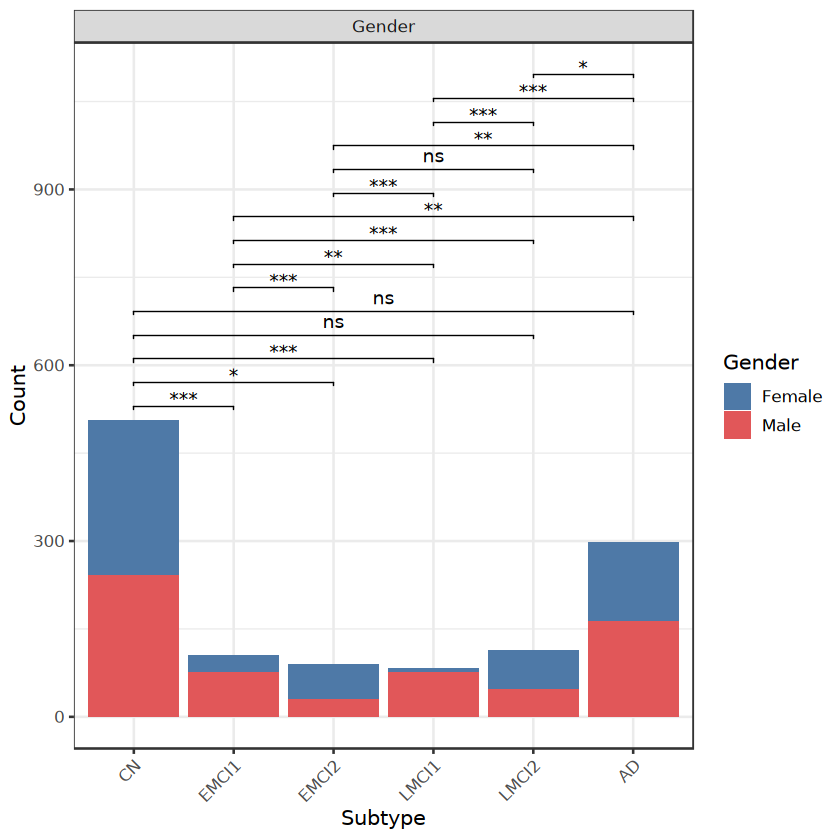

In [21]:
p_gender <- ggplot(df_gender, aes(x = SNF, fill = PTGENDER)) +
  geom_bar(position = "stack") +   # <-- ABSOLUTE COUNTS
  scale_fill_manual(values = c("Female"="#4E79A7", "Male"="#E15759")) +
  facet_wrap(~ Variable, scales = "free_y") +
  labs(
    x = "Subtype",
    y = "Count",
    fill = "Gender"
  ) +
  theme_bw(base_size = 12)+
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) 
  
p_gender <- p_gender +
  stat_pvalue_manual(
    pairwise_df,
    label = "signif",
    xmin = "xmin",
    xmax = "xmax",
    y.position = "y.position",
    tip.length = 0.01,
    inherit.aes = FALSE
  )
p_gender

In [138]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_gender_age.png',res = 300,height = 15,width = 8,unit='in')
ggarrange(
  p_gender,
  p_marker_age_gender,
  ncol = 1           # stack vertically
  #labels = c("A", "B")
)
dev.off()

png 
  2

In [22]:
library(purrr)
library(tibble)
library(dplyr)
library(tidyr)
library(rstatix)
library(ggplot2)




Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(feature2)

  # Now:
  data %>% select(all_of(feature2))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


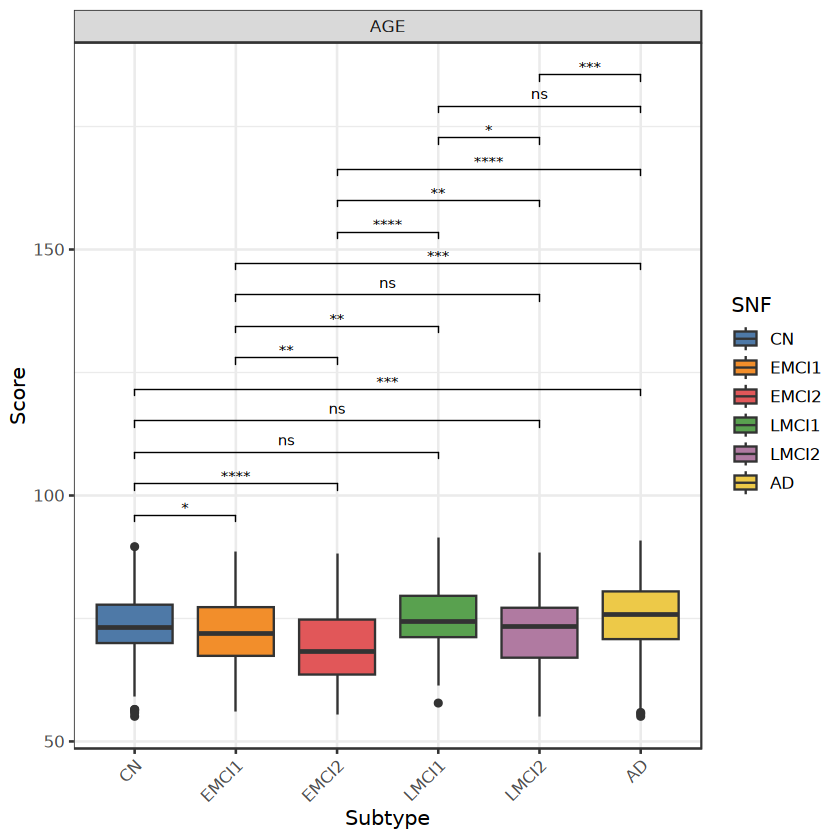

In [23]:
library(tidyr)

my_colors <- c(
  "CN"            = "#4E79A7",   # blue
  "EMCI1"  = "#F28E2B",   # orange
  "EMCI2"  = "#E15759",   # red
  "LMCI1"  = "#59A14F",   # green
  "LMCI2"  = "#B07AA1",   # purple
  "AD"            = "#EDC948"    # yellow
)


feature2 = c('AGE')
df_longadni_age_gender <- adni_age_gender %>%
  pivot_longer(cols = feature2,
               names_to = "Variable",
               values_to = "Score")%>%
  mutate(Variable = factor(Variable, levels = feature2))

stat_tableage_gender <- df_longadni_age_gender %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "none"
  ) %>%
  add_significance("p") %>%   # <-- creates p.signif
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Re-set y.position per facet, just above the local max
  mutate(
    max_score = max(df_longadni_age_gender$Score[df_longadni_age_gender$Variable == first(Variable)], na.rm = TRUE),
    y.position = max_score * (1.05 + 0.07 * (row_number() - 1))
  ) %>%
  ungroup()


p_marker_age_gender <- ggplot(df_longadni_age_gender, aes(x = SNF, y = Score, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_tableage_gender,
    label      = "p.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype")
p_marker_age_gender


In [34]:
#'FDG_bl','PIB_bl','AV45_bl',
features = c('ABETA_bl','PTAU_bl','TAU_bl','MidTemp_bl','Fusiform_bl','Entorhinal_bl')
adnimerge_bl_markers = merge(clinical[,c('PID','SNF')], adnimerge_bl_common, by.x='PID',by.y='PTID')[,c('PID','SNF',features)]
adnimerge_bl_markers[1:5,]

,PID,SNF,ABETA_bl,PTAU_bl,TAU_bl,MidTemp_bl,Fusiform_bl,Entorhinal_bl
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,002_S_0295,CN,888.1,34.73,355.2,19829,16561,3619
2,002_S_0413,CN,1006,10.57,107.3,20341,20208,4133
3,002_S_0559,CN,1245,15.82,188.6,22649,18629,3974
4,002_S_0685,CN,>1700,22.82,265.9,18673,13629,4201
5,002_S_0729,lmcisubtype2,957.8,31.69,316.9,17213,18072,2511


In [35]:
adnimerge_bl_markers$SNF <- factor(
  adnimerge_bl_markers$SNF,
  levels = c("CN", "emcisubtype1", "emcisubtype2", 
             "lmcisubtype1", "lmcisubtype2", "AD"),
  labels = c("CN", "EMCI1", "EMCI2", "LMCI1", "LMCI2", "AD")
)


In [36]:

library(purrr)
library(tibble)
library(dplyr)
library(tidyr)
library(rstatix)
library(ggplot2)

clinical2$SNF <- factor(
  clinical2$SNF,
  levels = c("CN", "emcisubtype1", "emcisubtype2", 
             "lmcisubtype1", "lmcisubtype2", "AD"),
  labels = c("CN", "EMCI1", "EMCI2", "LMCI1", "LMCI2", "AD")
)


clinical2_z <- clinical2

for (v in cog) {
  clinical2_z[[paste0("Z_", v)]] <-
    scale(clinical2_z[[v]])[,1]   # convert scale() matrix → numeric vector
}


## --- directly regress raw scores, then z-score residuals ---

zresiduals <- map_df(cog, function(v) {

  # linear model on RAW cognitive score
  model <- lm(clinical2[[v]] ~ AGE + PTGENDER, data = clinical2)
  res   <- resid(model)

  tibble(
    PID      = clinical2$PID,
    Variable = v,
    # age- and sex-adjusted z-score residuals
    Zadj     = as.numeric(scale(res)[, 1])
  )
})

zresid_wide <- zresiduals %>%
  pivot_wider(
    names_from  = Variable,
    values_from = Zadj,
    names_prefix = "Zadj_"
  )

clinical2_adjZ <- clinical2 %>%
  left_join(zresid_wide, by = "PID")

df_long_adjZ <- zresiduals %>%
  left_join(clinical2 %>% select(PID, SNF), by = "PID")



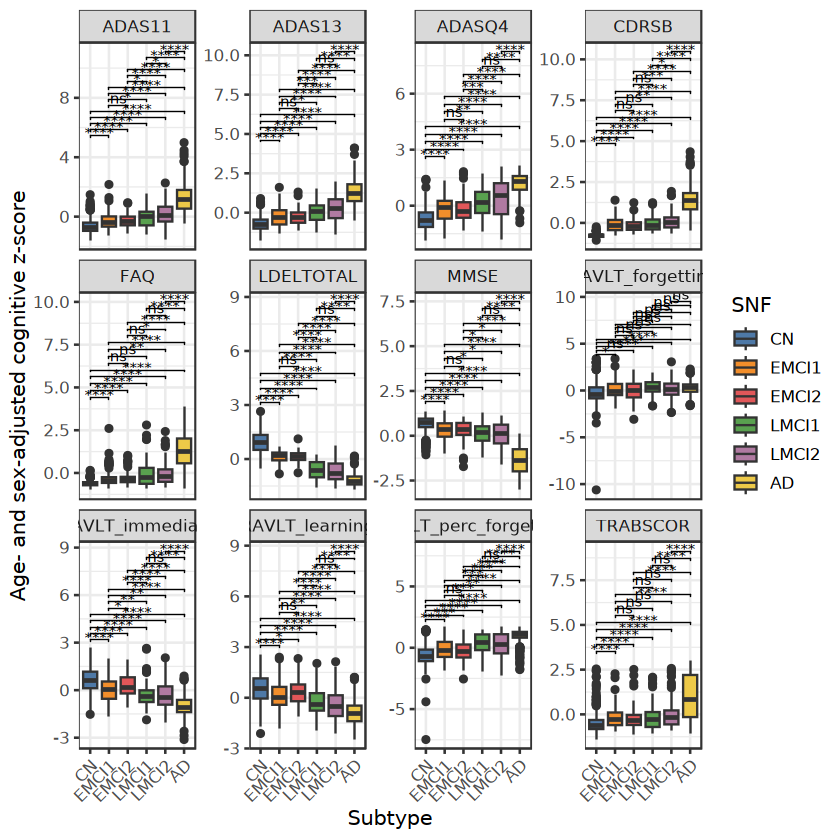

In [243]:
library(rstatix)
library(ggplot2)

# --------------------------------------------------
# 1) Pairwise Wilcoxon tests on adjusted z-scores
# --------------------------------------------------
stat_table_adjZ <- df_long_adjZ %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Zadj ~ SNF,
    p.adjust.method = "BH"
  ) %>%
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Put brackets just above the max adjusted z-score for that variable
  mutate(
    max_score = max(
      df_long_adjZ$Zadj[df_long_adjZ$Variable == first(Variable)],
      na.rm = TRUE
    ),
    y.position = max_score + 0.5 + 0.4 * (row_number() - 1)
  ) %>%
  ungroup()

# --------------------------------------------------
# 2) Plot: age+sex-adjusted z-scores
# --------------------------------------------------
p_clinical_adjZ <- ggplot(df_long_adjZ, aes(x = SNF, y = Zadj, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data        = stat_table_adjZ,
    label       = "p.adj.signif",
    xmin        = "group1",
    xmax        = "group2",
    y.position  = "y.position",
    tip.length  = 0.01,
    size        = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype") +
  ylab("Age- and sex-adjusted cognitive z-score")

p_clinical_adjZ


In [245]:
library(effsize)

# Subset groups
x <- clinical2_adjZ$Zadj_RAVLT_immediate[clinical2_adjZ$SNF == "EMCI1"]
y <- clinical2_adjZ$Zadj_RAVLT_immediate[clinical2_adjZ$SNF == "EMCI2"]

# Compute Cohen's d
d_result <- cohen.d(x, y, hedges.c = FALSE)
d_result



Cohen's d

d estimate: -0.3459995 (small)
95 percent confidence interval:
      lower       upper 
-0.63142176 -0.06057727 


In [246]:
# Subset groups
x <- clinical2_adjZ$Zadj_ADAS11[clinical2_adjZ$SNF == "LMCI1"]
y <- clinical2_adjZ$Zadj_ADAS11[clinical2_adjZ$SNF == "LMCI2"]

# Compute Cohen's d
d_result <- cohen.d(x, y, hedges.c = TRUE)
d_result



Hedges's g

g estimate: -0.336798 (small)
95 percent confidence interval:
      lower       upper 
-0.62222813 -0.05136777 


In [247]:
# Subset groups
x <- clinical2_adjZ$Zadj_CDRSB[clinical2_adjZ$SNF == "LMCI1"]
y <- clinical2_adjZ$Zadj_CDRSB[clinical2_adjZ$SNF == "LMCI2"]

# Compute Cohen's d
d_result <- cohen.d(x, y, hedges.c = TRUE)
d_result



Hedges's g

g estimate: -0.2882111 (small)
95 percent confidence interval:
       lower        upper 
-0.573119726 -0.003302541 


In [219]:
library(rstatix)
library(ggplot2)

# --------------------------------------------------
# 1) Pairwise Wilcoxon tests on adjusted z-residuals
# --------------------------------------------------
stat_table_adjZ <- df_long_adjZ %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Zresid ~ SNF,
    p.adjust.method = "BH"
  ) %>%
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Put brackets just above the max residual for that variable
  mutate(
    max_score = max(df_long_adjZ$Zresid[df_long_adjZ$Variable == first(Variable)],
                    na.rm = TRUE),
    y.position = max_score + 0.5 + 0.4 * (row_number() - 1)
  ) %>%
  ungroup()

# --------------------------------------------------
# 2) Plot: age+gender-adjusted z-residuals
# --------------------------------------------------
p_clinical_adjZ <- ggplot(df_long_adjZ, aes(x = SNF, y = Zresid, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table_adjZ,
    label      = "p.adj.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype") +
  ylab("Age- and sex-adjusted z-score residual")

p_clinical_adjZ


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `data = map(.data$data, .f, ...)`.
[1mCaused by error in `map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[36mℹ[39m With name: V1.
[1mCaused by error in `pull()`:[22m
[33m![39m Can't extract columns that don't exist.
[31m✖[39m Column `Zresid` doesn't exist.


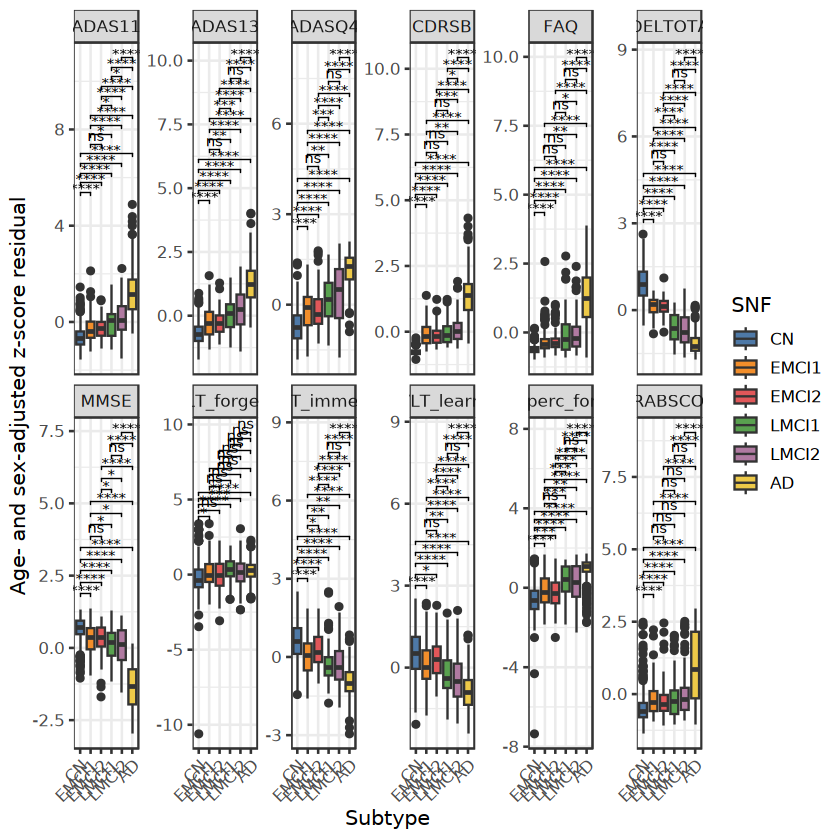

In [179]:
p_clinical_adjZ2 <- ggplot(df_long_adjZ, aes(x = SNF, y = Zresid, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 6) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table_adjZ,
    label      = "p.adj.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype") +
  ylab("Age- and sex-adjusted z-score residual")

p_clinical_adjZ2

In [180]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_p_clinical_adjZ2.png',res = 300,height = 7,width = 20,unit='in')
p_clinical_adjZ2
dev.off()

png 
  2

In [244]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_p_clinical_adjZ22_FITFIRST.png',res = 300,height = 7,width = 20,unit='in')
p_clinical_adjZ2
dev.off()

png 
  2

In [195]:
PAB = ggarrange(
  p_gender,
  p_marker_age_gender,
  ncol = 1           # stack vertically
  #labels = c("A", "B")
)

pabc = ggarrange(
  PAB,
  p_marker,
  ncol = 2,widths=c(1.2,3)
)

png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_p_age_sex_marker_mri_abc.png',res = 300,height = 7,width = 16,unit='in')
pabc
dev.off()

png 
  2

In [200]:
PAB = ggarrange(
  p_gender,
  p_marker_age_gender,
  ncol = 1 ,          # stack vertically
  labels = c("A", "B")
)

p_marker21 = ggarrange(
  p_marker1,
  p_marker2,
  ncol = 1,          # stack vertically
  labels = c("C", "D")
)

pabcd = ggarrange(
  PAB,
  p_marker21,
  ncol = 2,widths=c(1.2,3)
)

p_e = ggarrange(
  p_clinical_adjZ2,
  labels = c("E")
)

pabcde = ggarrange(
  pabcd,
  p_e,
  ncol = 1
)

png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_p_cog_all_age_sex_marker_mri_abcde.png',res = 300,height = 7,width = 16,unit='in')
pabcde
dev.off()

png 
  2

In [203]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_p_cog_all_age_sex_marker_mri_abcde.png',res = 300,height = 15,width = 16,unit='in')
pabcde
dev.off()

png 
  2

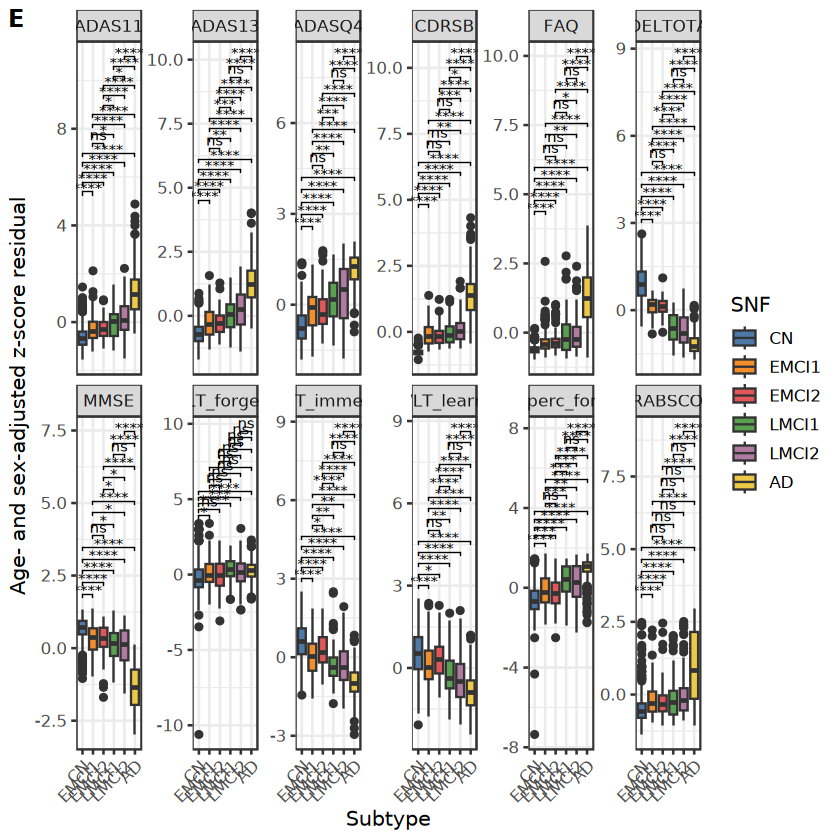

In [199]:

p_e

In [ ]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Boxplot_gender_age.png',res = 300,height = 15,width = 8,unit='in')
ggarrange(
  p_gender,
  p_marker_age_gender,
  ncol = 1           # stack vertically
  #labels = c("A", "B")
)
dev.off()

In [47]:

png('adjusted_clinical_zscore.png',res=300,width = 15,height = 15,unit='in')
p_clinical_adjZ
dev.off()

png 
  2

# heatmap

In [87]:
library(viridis)
num_colors <- 100 
plasma_colors <- plasma(n = num_colors, direction = 1) 

Loading required package: viridisLite



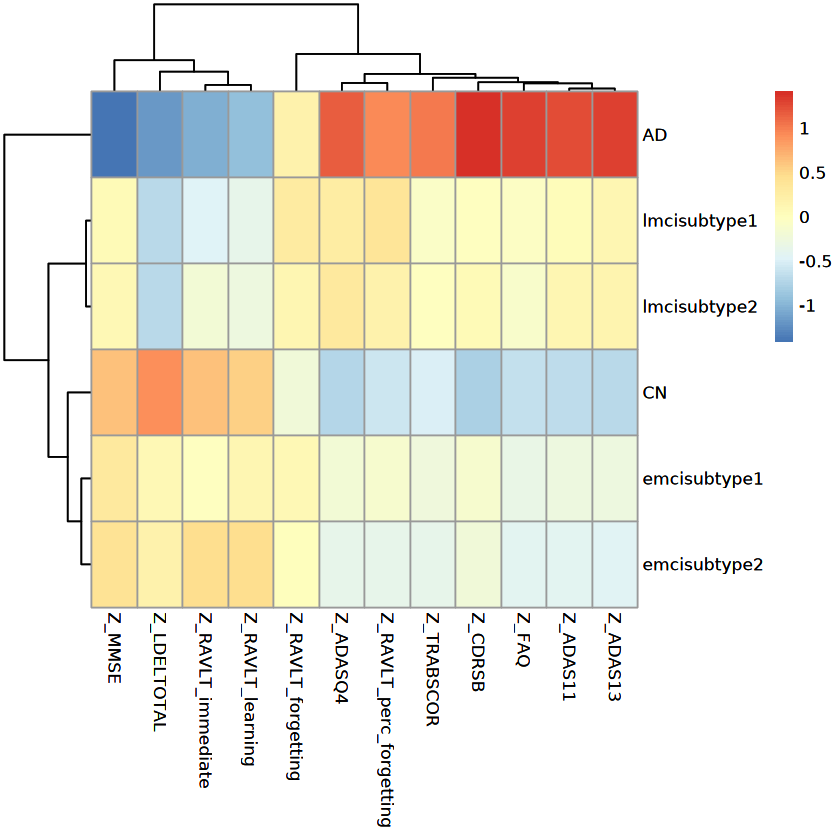

In [85]:
z_clinical_summary <- clinical2_z[,c('PID',paste0('Z_',cog),'SNF')]%>%
  group_by(SNF) %>%
  summarise(
    across(
      all_of(paste0('Z_',cog)),
      list(mean = ~mean(.x, na.rm = TRUE)),
      .names = "{.col}"
           #sd   = ~sd(.x, na.rm = TRUE)),
    )
  )
z_summary_vals = as.data.frame(z_clinical_summary[,-c(1)])
rownames(z_summary_vals) = z_clinical_summary$SNF
phz = pheatmap(z_summary_vals)
phz

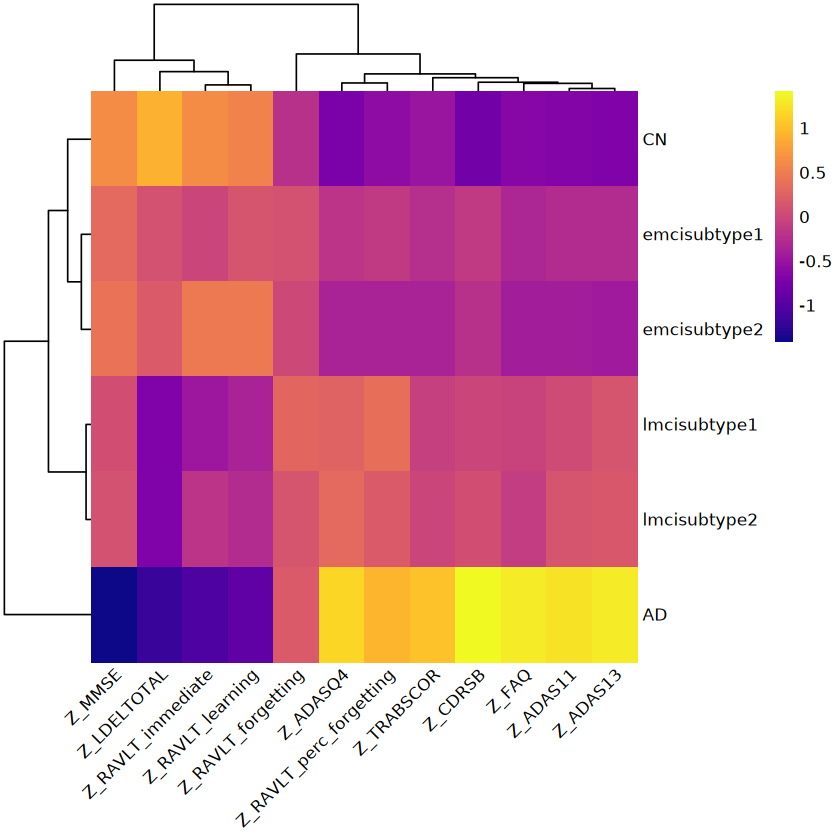

In [91]:
new_order_ <- c("CN", "emcisubtype1", "emcisubtype2",
               "lmcisubtype1", "lmcisubtype2", "AD")

col_dend <- dendextend::rotate(as.dendrogram(phz$tree_row), order = new_order)
pheatmap(z_summary_vals, cluster_rows =as.hclust(col_dend),color = plasma_colors,border_color = NA,angle_col = 45)

In [ ]:
pheatmap(z_summary_vals, cluster_rows =as.hclust(col_dend),color = plasma_colors,border_color = NA,angle_col = 45)
pheatmap(z_summary_vals, cluster_rows =as.hclust(col_dend),color = plasma_colors,border_color = NA,angle_col = 45)

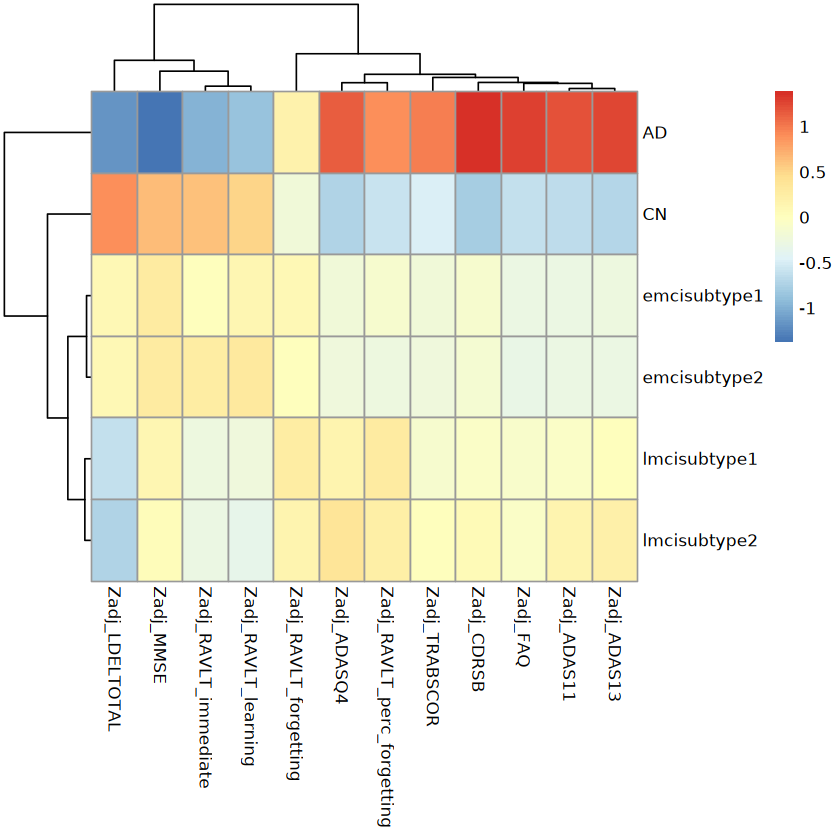

In [94]:
zadj_clinical_summary <- clinical2_adjZ[,c(colnames(zresid_wide),'SNF')] %>%
  group_by(SNF) %>%
  summarise(
    across(
      all_of(colnames(zresid_wide[,-c(1)])),
      list(mean = ~mean(.x, na.rm = TRUE)),
      .names = "{.col}"
           #sd   = ~sd(.x, na.rm = TRUE)),
    )
  )
zadj_summary_vals = as.data.frame(zadj_clinical_summary[,-c(1)])
rownames(zadj_summary_vals) = zadj_clinical_summary$SNF
phzadj = pheatmap(zadj_summary_vals)

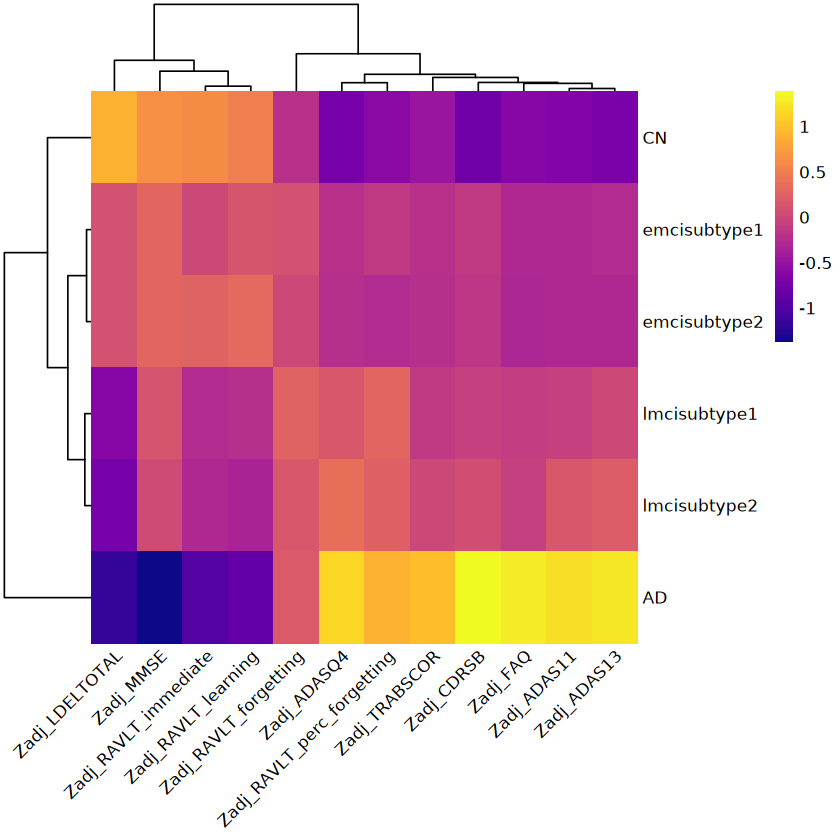

In [97]:
new_order <- c("CN", "emcisubtype1", "emcisubtype2",
               "lmcisubtype1", "lmcisubtype2", "AD")

col_dend2 <- dendextend::rotate(as.dendrogram(phzadj$tree_row), order = new_order)
pheatmap(zadj_summary_vals, cluster_rows =as.hclust(col_dend2),color = plasma_colors,border_color = NA,angle_col = 45)

In [101]:
z_summary_vals_rename = z_summary_vals
colnames(z_summary_vals_rename) = cog
zadj_summary_vals_rename = zadj_summary_vals
colnames(zadj_summary_vals_rename) = cog

In [116]:
# Lists all active graphics devices
dev.list()
# If dev.list() is not NULL, you should close them
while (!is.null(dev.list())) {
  dev.off()
}

png pdf pdf png png png png png 
  2   4   5   6   7   8   9  10

In [121]:
pheatmap(z_summary_vals_rename, cluster_rows =as.hclust(col_dend),color = plasma_colors,border_color = NA,angle_col = 45,
filename     = "/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/heatmap_RAW_clinical_zscore_figure4.png",
  width        = 10,   # in inches
  height       = 6,
  dpi          = 300)

In [122]:
pheatmap(zadj_summary_vals_rename, cluster_rows =as.hclust(col_dend2),color = plasma_colors,border_color = NA,angle_col = 45,
filename     = "/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/heatmap_ADJ_clinical_zscore_figure4.png",
  width        = 10,   # in inches
  height       = 6,
  dpi          = 300)

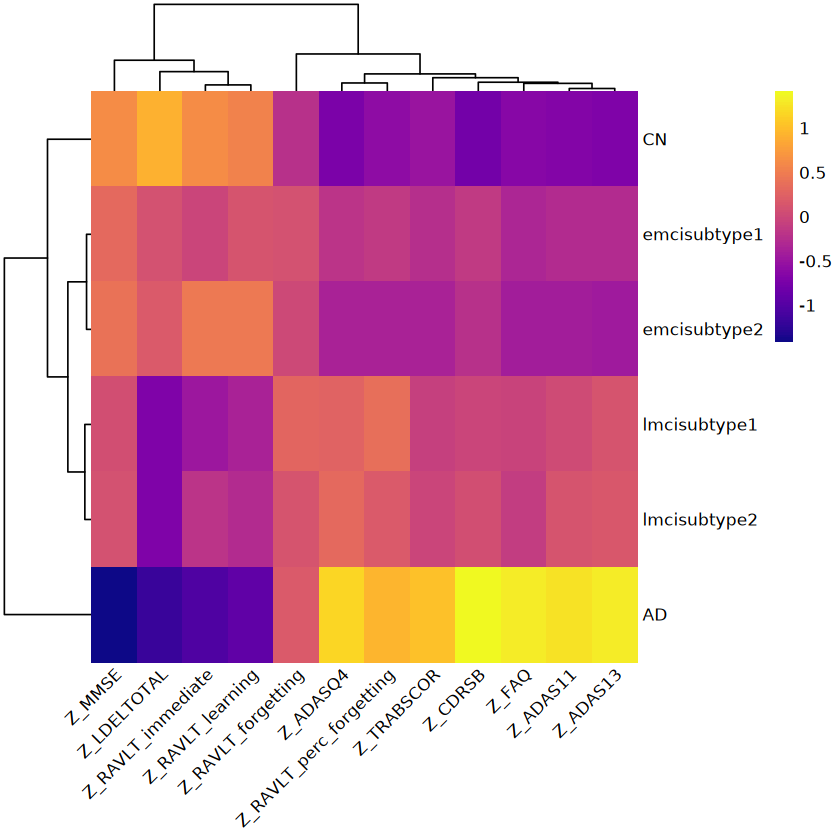

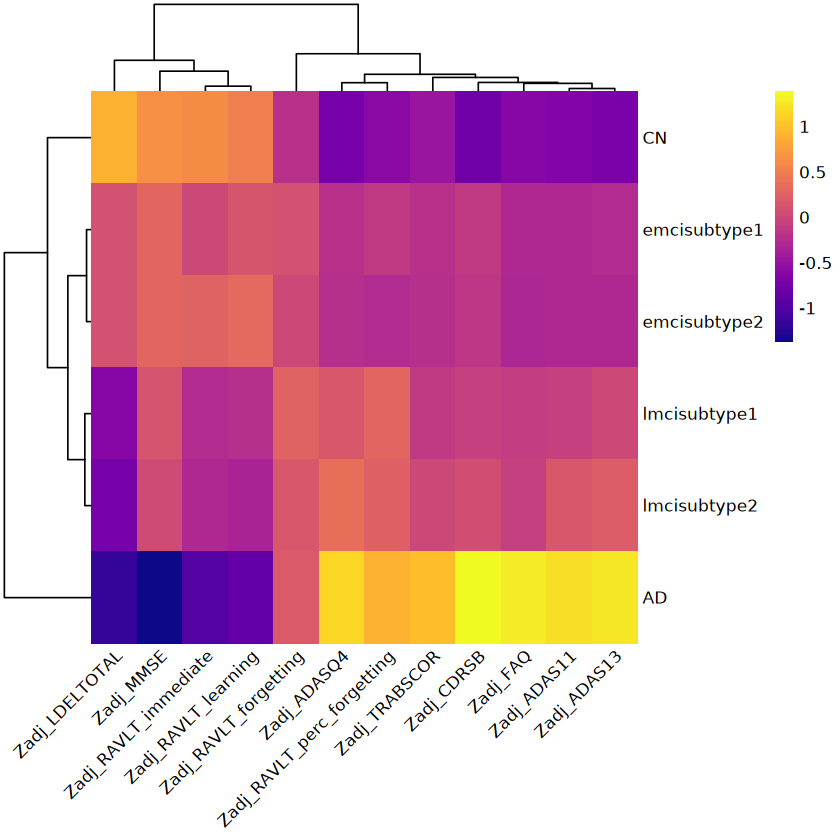

In [102]:
pheatmap(z_summary_vals, cluster_rows =as.hclust(col_dend),color = plasma_colors,border_color = NA,angle_col = 45)
pheatmap(zadj_summary_vals, cluster_rows =as.hclust(col_dend2),color = plasma_colors,border_color = NA,angle_col = 45)

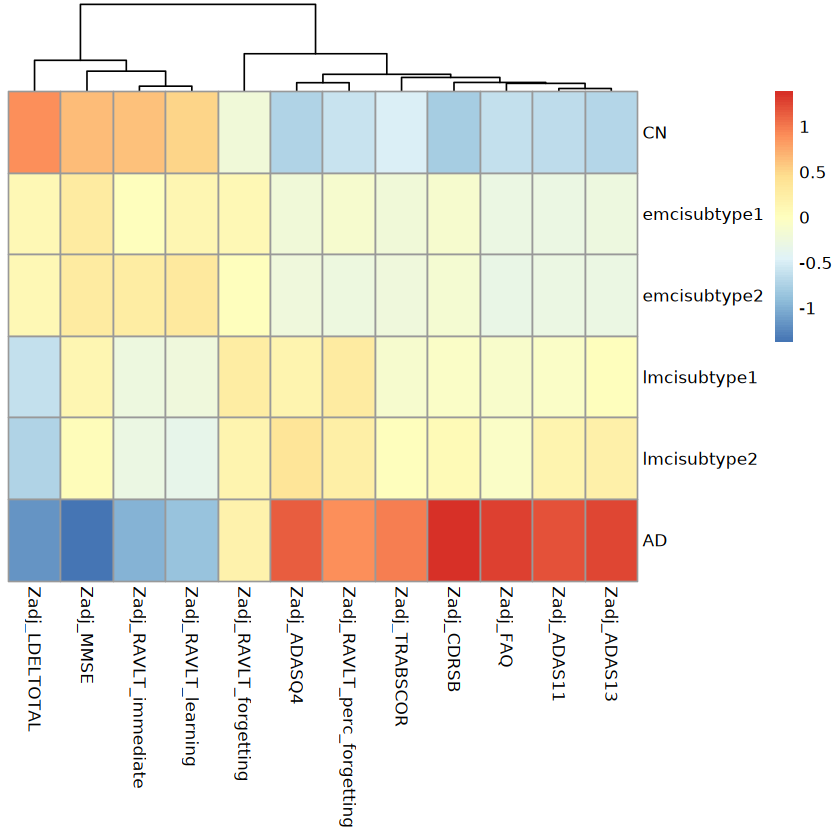

In [65]:
desired_order <- c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD")

pheatmap(zadj_summary_vals, cluster_rows = FALSE, 
         cluster_cols = TRUE,
         levels = desired_order)


# Bowei

In [37]:
df_clean <- adnimerge_bl_markers %>%
  mutate(
    # Remove ">" and convert to numeric
    ABETA_bl = str_replace(ABETA_bl, ">", ""),
    PTAU_bl  = str_replace(PTAU_bl,  ">", ""),
    TAU_bl   = str_replace(TAU_bl,   ">", ""),

    # Convert empty strings "" to NA
    ABETA_bl = na_if(ABETA_bl, ""),
    PTAU_bl  = na_if(PTAU_bl,  ""),
    TAU_bl   = na_if(TAU_bl,   ""),

    # Convert to numeric
    ABETA_bl = as.numeric(ABETA_bl),
    PTAU_bl  = as.numeric(PTAU_bl),
    TAU_bl   = as.numeric(TAU_bl)
  )

df_clean = df_clean[complete.cases(df_clean),]
df_clean$SNF <- factor(
  df_clean$SNF,
  levels = c("CN", "EMCI1", "EMCI2", "LMCI1", "LMCI2", "AD")
)
df_clean[1:5,]

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ABETA_bl = as.numeric(ABETA_bl)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


,PID,SNF,ABETA_bl,PTAU_bl,TAU_bl,MidTemp_bl,Fusiform_bl,Entorhinal_bl
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,002_S_0295,CN,888.1,34.73,355.2,19829,16561,3619
2,002_S_0413,CN,1006.0,10.57,107.3,20341,20208,4133
3,002_S_0559,CN,1245.0,15.82,188.6,22649,18629,3974
4,002_S_0685,CN,1700.0,22.82,265.9,18673,13629,4201
5,002_S_0729,LMCI2,957.8,31.69,316.9,17213,18072,2511


In [26]:
library(dplyr)
library(purrr)
library(rstatix)   # for adjust_pvalue, add_significance, add_xy_position
library(stats) 

In [38]:
features1 = c('ABETA_bl','PTAU_bl','TAU_bl')
features2 = c('MidTemp_bl','Fusiform_bl','Entorhinal_bl')

In [47]:
abeta_ratio = read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/abeta_ratio_batemanlab.csv')
abeta_ratio_sub = merge(abeta_ratio,df_clean,by.x='PTID',by.y='PID')
abeta_ratio_sub[1:5,]

,PTID,X,DX.bl,mean_RATIO_ABETA42_40,SNF,ABETA_bl,PTAU_bl,TAU_bl,MidTemp_bl,Fusiform_bl,Entorhinal_bl
,<chr>,<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,002_S_2073,2,EMCI,0.1134765,EMCI2,1094.0,24.09,250.2,20511,19862,4402
2,002_S_4213,3,CN,0.1236776,CN,1691.0,18.85,216.2,19310,18023,4413
3,002_S_4219,4,LMCI,0.1386711,LMCI2,908.7,10.16,119.1,18469,19019,3787
4,002_S_4237,5,EMCI,0.1319351,EMCI2,1700.0,25.66,302.1,18784,16367,3915
5,002_S_4262,6,CN,0.1121310,CN,790.5,34.28,347.9,20776,16215,3738


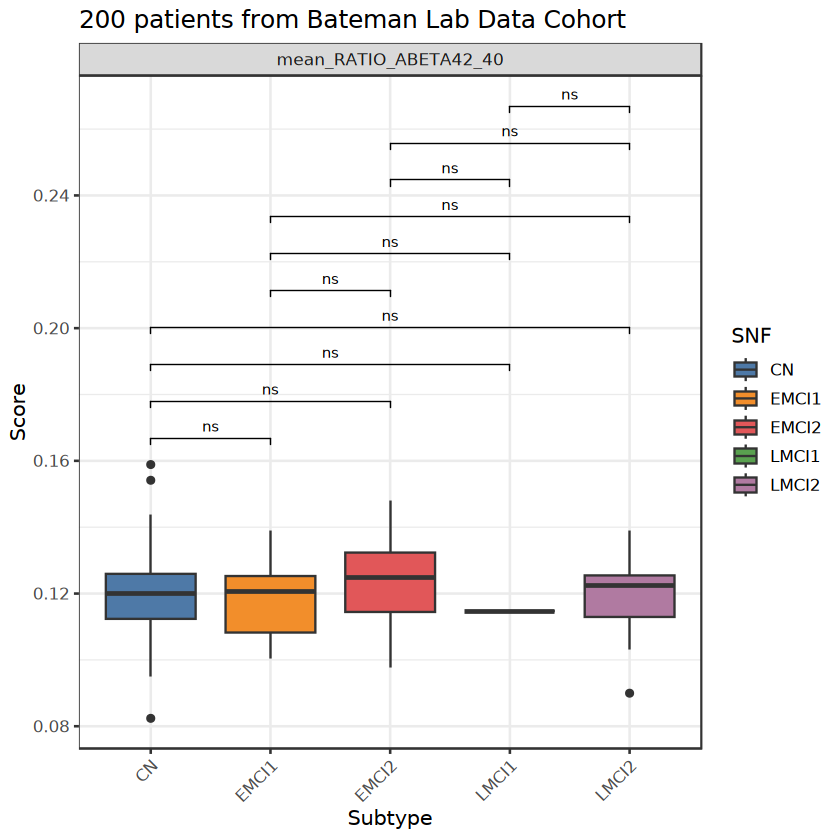

In [50]:
library(tidyr)
features1 = 'mean_RATIO_ABETA42_40'
df_long21 <- abeta_ratio_sub %>%
  pivot_longer(cols = features1,
               names_to = "Variable",
               values_to = "Score")%>%
  mutate(Variable = factor(Variable, levels = features1))

stat_table21 <- df_long21 %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "none"
  ) %>%
  add_significance("p") %>%   # <-- creates p.signif
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Re-set y.position per facet, just above the local max
  mutate(
    max_score = max(df_long21$Score[df_long21$Variable == first(Variable)], na.rm = TRUE),
    y.position = max_score * (1.05 + 0.07 * (row_number() - 1))
  ) %>%
  ungroup()


p_marker1 <- ggplot(df_long21, aes(x = SNF, y = Score, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table21,
    label      = "p.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype")+ggtitle('200 patients from Bateman Lab Data Cohort')
p_marker1


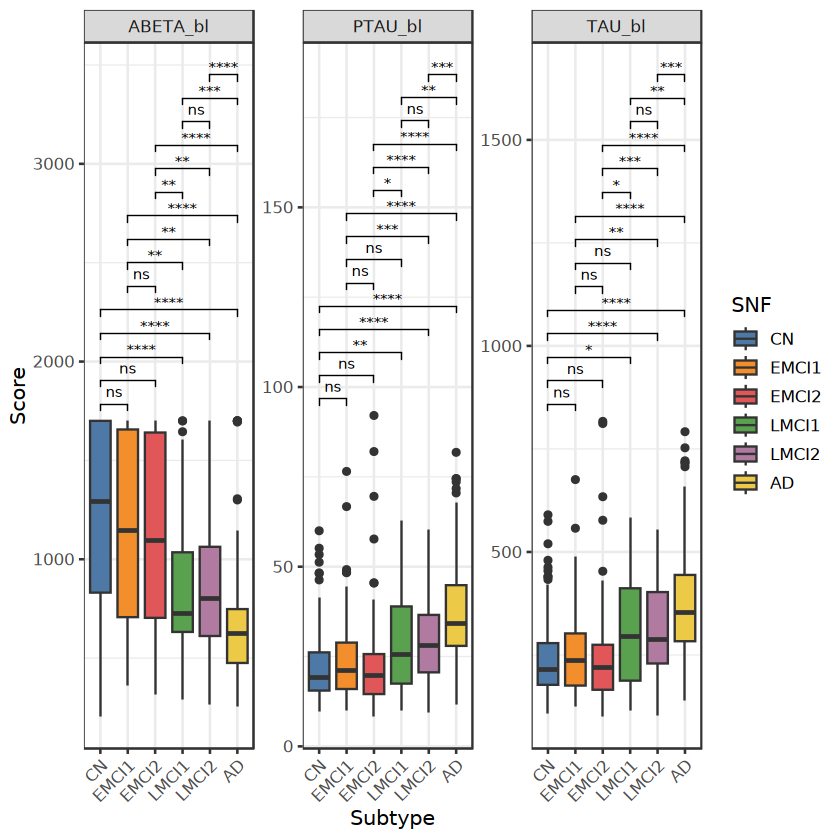

In [39]:
library(tidyr)

df_long21 <- df_clean %>%
  pivot_longer(cols = features1,
               names_to = "Variable",
               values_to = "Score")%>%
  mutate(Variable = factor(Variable, levels = features1))

stat_table21 <- df_long21 %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "none"
  ) %>%
  add_significance("p") %>%   # <-- creates p.signif
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Re-set y.position per facet, just above the local max
  mutate(
    max_score = max(df_long21$Score[df_long21$Variable == first(Variable)], na.rm = TRUE),
    y.position = max_score * (1.05 + 0.07 * (row_number() - 1))
  ) %>%
  ungroup()


p_marker1 <- ggplot(df_long21, aes(x = SNF, y = Score, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table21,
    label      = "p.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype")
p_marker1


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(features2)

  # Now:
  data %>% select(all_of(features2))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


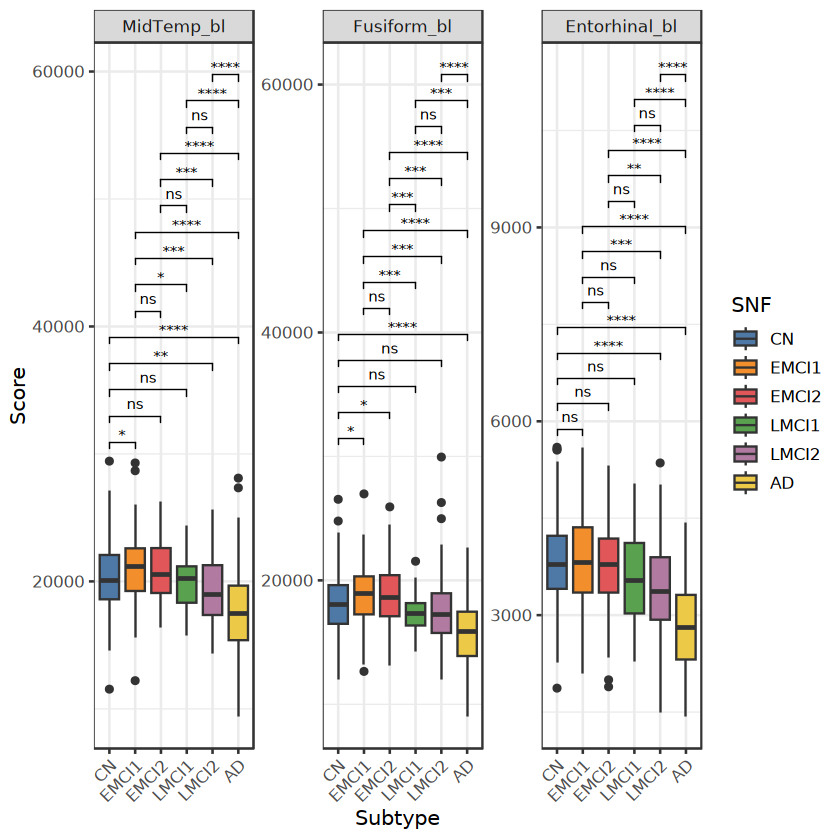

In [190]:
library(tidyr)

df_long22 <- df_clean %>%
  pivot_longer(cols = features2,
               names_to = "Variable",
               values_to = "Score")%>%
  mutate(Variable = factor(Variable, levels = features2))

stat_table22 <- df_long22 %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "none"
  ) %>%
  add_significance("p") %>%   # <-- creates p.signif
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Re-set y.position per facet, just above the local max
  mutate(
    max_score = max(df_long22$Score[df_long22$Variable == first(Variable)], na.rm = TRUE),
    y.position = max_score * (1.05 + 0.07 * (row_number() - 1))
  ) %>%
  ungroup()


p_marker2 <- ggplot(df_long22, aes(x = SNF, y = Score, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table22,
    label      = "p.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype")
p_marker2


In [81]:
png('ADNI_biomarker_neuroimage_featureplot.png',width=15,height=15,unit='in',res=300)
p_marker
dev.off()

png 
  2

In [83]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(rstatix)   # for pairwise_wilcox_test



cog <- c(
  'CDRSB','ADAS11','ADAS13','ADASQ4','MMSE','RAVLT_immediate',
  'RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting',
  'LDELTOTAL','TRABSCOR','FAQ'
)

clinical2 <- clinical[complete.cases(clinical[, cog]), ]
clinical2$SNF <- factor(
  clinical2$SNF,
  levels = c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD")
)

# --------------------------------------------------
# 1. Convert to long format
# --------------------------------------------------
df_long <- clinical2 %>%
  pivot_longer(cols = all_of(cog),
               names_to = "Variable", values_to = "Score")

# --------------------------------------------------
# 2. Pairwise Wilcoxon test for each variable
# --------------------------------------------------
stat_table <- df_long %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "BH"
  ) %>%
  add_xy_position(x = "SNF")

# --------------------------------------------------
# 3. Faceted plot with significance
# -----------


In [87]:
min(clinical2$RAVLT_perc_forgetting)
clinical2[clinical2$RAVLT_perc_forgetting==-218.182,]

[1] -218.182

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
339,082_S_6287,CN,69.3,0,18,3,0,0,0,6,⋯,2,29,43,7,-24,-218.182,14,48,0,0


: 

In [39]:
stat_table[1:5,]

Variable,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups,xmin,xmax,label
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<chr>
ADAS11,Score,CN,emcisubtype1,505,105,15954.5,1.23e-10,2.31e-10,****,78.5500,"CN , emcisubtype1",1,2,****
ADAS11,Score,CN,emcisubtype2,505,90,15860.0,4.74e-06,6.46e-06,****,116.9929,"CN , emcisubtype2",1,3,****
ADAS11,Score,CN,lmcisubtype1,505,83,7011.5,2.18e-22,4.67e-22,****,155.4357,"CN , lmcisubtype1",1,4,****
ADAS11,Score,CN,lmcisubtype2,505,114,10757.0,1.27e-25,3.20e-25,****,193.8786,"CN , lmcisubtype2",1,5,****
ADAS11,Score,CN,AD,505,297,2193.5,6.15e-117,9.23e-116,****,232.3214,"CN, AD",1,6,****


In [84]:
stat_table <- df_long %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Score ~ SNF,
    p.adjust.method = "BH"
  ) %>%
  ungroup() %>%
  add_xy_position(x = "SNF") %>%
  group_by(Variable) %>%
  # Re-set y.position per facet, just above the local max
  mutate(
    max_score = max(df_long$Score[df_long$Variable == first(Variable)], na.rm = TRUE),
    y.position = max_score * (1.05 + 0.07 * (row_number() - 1))
  ) %>%
  ungroup()


In [44]:
p_clinical <- ggplot(df_long, aes(x = SNF, y = Score, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    data       = stat_table,
    label      = "p.adj.signif",
    xmin       = "group1",
    xmax       = "group2",
    y.position = "y.position",
    tip.length = 0.01,
    size       = 3,
    inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(size = 10)
  ) +
  xlab("Subtype")
p_clinical

ERROR: Error in eval(expr, envir, enclos): object 'df_long' not found


In [ ]:
library(ggpubr)

combined <- ggarrange(
  p_marker,
  p_clinical,
  ncol = 2, nrow = 1,
  labels = c("A", "B"),
  common.legend = TRUE,
  legend = "bottom",
  align = "hv"
)

combined


In [46]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Revewier5_clinicalboxplot_betterviz.png',width=15,height=15,unit='in',res=300)
p_clinical
dev.off()

png 
  2

# Age adjusted residuals

In [30]:
library(dplyr)
library(tidyr)
library(purrr)
library(rstatix)

cog <- c(
  'CDRSB','ADAS11','ADAS13','ADASQ4','MMSE','RAVLT_immediate',
  'RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting',
  'LDELTOTAL','TRABSCOR','FAQ'
)

clinical2 <- clinical[complete.cases(clinical[, cog]), ]

clinical2$SNF <- factor(
  clinical2$SNF,
  levels = c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD")
)

# Make gender a factor for the model
clinical2$PTGENDER <- factor(clinical2$PTGENDER, levels = c(0,1),
                             labels = c("Female","Male"))

clinical2[1:3,]

,PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,CDRSB,ADAS11,⋯,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,SNFSUB
,<chr>,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,002_S_0295,CN,84.8,Male,18,3,0,1,0,3.00,⋯,1,28,56,5,3,23.07690,12,300,0,0
2,002_S_0413,CN,76.3,Female,16,3,0,0,0,3.33,⋯,1,29,52,6,5,41.66670,12,55,0,0
3,002_S_0559,CN,79.3,Male,16,3,3,1,0,6.00,⋯,2,30,48,5,1,9.09091,15,53,0,0


In [37]:
age_gender_residuals <- map_df(cog, function(v) {
  #model <- lm(clinical2[[v]] ~ AGE + PTGENDER, data = clinical2)
  model <- lm(clinical2[[v]] ~ PTGENDER, data = clinical2)
  tibble(
    PID      = clinical2$PID,
    Variable = v,
    Residual = resid(model)
  )
})
age_gender_wide <- age_gender_residuals %>%
  pivot_wider(names_from = Variable, values_from = Residual,
              names_prefix = "AGESEXadj_")

clinical2_adj <- clinical2 %>%
  left_join(age_gender_wide, by = "PID")
df_long_adj <- age_gender_residuals %>%
  left_join(clinical2 %>% select(PID, SNF), by = "PID")

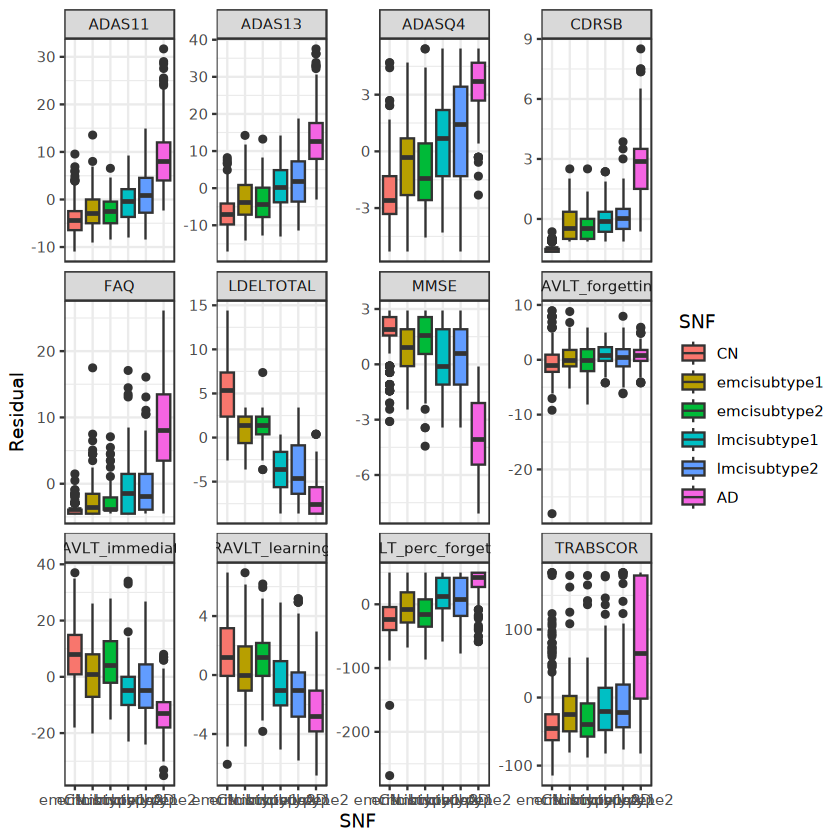

In [38]:

ggplot(df_long_adj, aes(x = SNF, y = Residual, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  theme_bw()


In [ ]:
ggplot(df_long_adj, aes(x = SNF, y = Residual, fill = SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  theme_bw()

    
stat_table_adj <- df_long_adj %>%
  group_by(Variable) %>%
  pairwise_wilcox_test(
    Residual ~ SNF,
    p.adjust.method = "BH"
  ) %>%
  add_xy_position(x = "SNF")



In [36]:

my_colors <- c(
  "CN"            = "#4E79A7",   # blue
  "emcisubtype1"  = "#F28E2B",   # orange
  "emcisubtype2"  = "#E15759",   # red
  "lmcisubtype1"  = "#59A14F",   # green
  "lmcisubtype2"  = "#B07AA1",   # purple
  "AD"            = "#EDC948"    # yellow
)


p <- ggplot(df_long, aes(x = SNF, y = Score,fill=SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  scale_fill_manual(values = my_colors) +
  stat_pvalue_manual(
    stat_table,
    label = "p.adj.signif",
    tip.length = 0.01,
    size = 3,inherit.aes = FALSE
  ) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text = element_text(size = 10)
  ) +
  xlab("Subtype")

p

ERROR: [1m[33mError[39m in `dplyr::mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `label = as.character(data %>% pull("p.adj.signif"))`.
[36mℹ[39m In group 1: `Variable = "ADAS11"`.
[1mCaused by error:[22m
[1m[22m[33m![39m `label` must be size 15 or 1, not 180.


In [29]:

p2 <- ggplot(df_long, aes(x = SNF, y = Score,fill=SNF)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free_y", ncol = 4) +
  scale_fill_manual(values = my_colors) +
  theme_bw(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text = element_text(size = 10)
  ) +
  xlab("Subtype")

png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Revewier5_clinicalboxplot_nostats.png',width=15,height=15,unit='in',res=300)
p2
dev.off()

png 
  2

In [25]:
png('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review/Revewier5_clinicalboxplot2.png',width=15,height=15,unit='in',res=300)
p
dev.off()

png 
  2

In [9]:
df_long

PID,SNF,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4,SNFSUB,Variable,Score
<chr>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
002_S_0295,CN,84.8,1,18,3,0,1,0,CDRSB,0.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,ADAS11,3.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,ADAS13,4.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,ADASQ4,1.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,MMSE,28.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,RAVLT_immediate,56.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,RAVLT_learning,5.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,RAVLT_forgetting,3.0000
002_S_0295,CN,84.8,1,18,3,0,1,0,RAVLT_perc_forgetting,23.0769


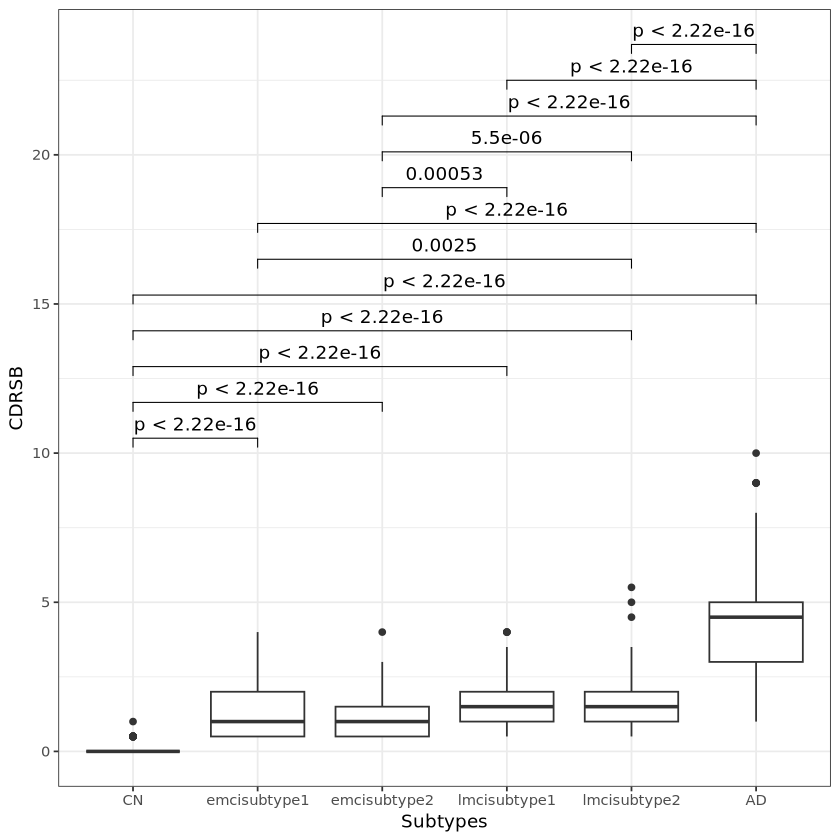

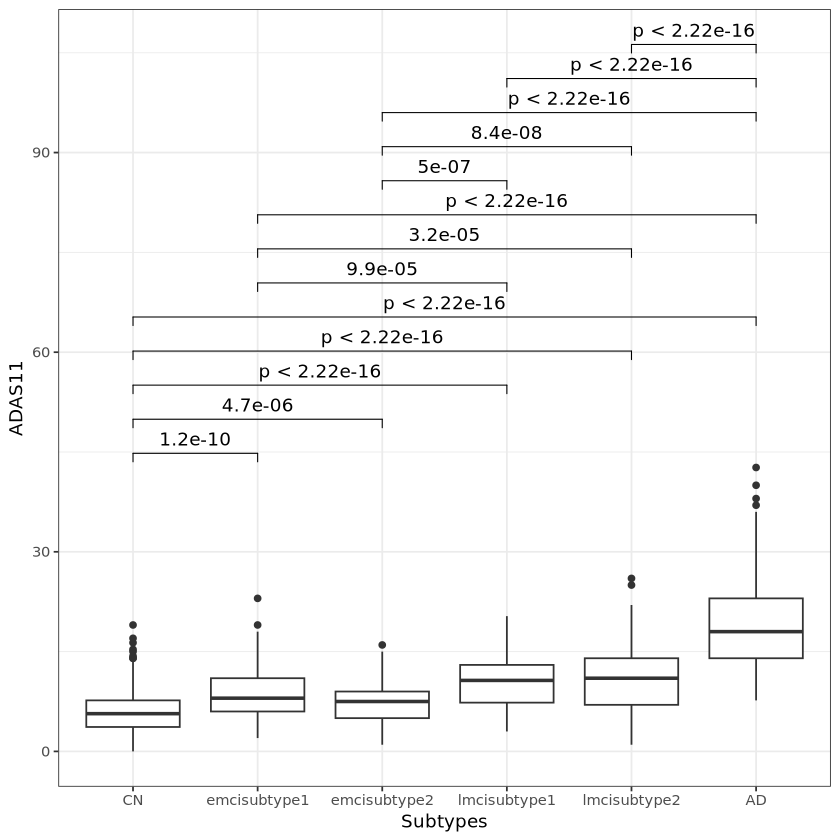

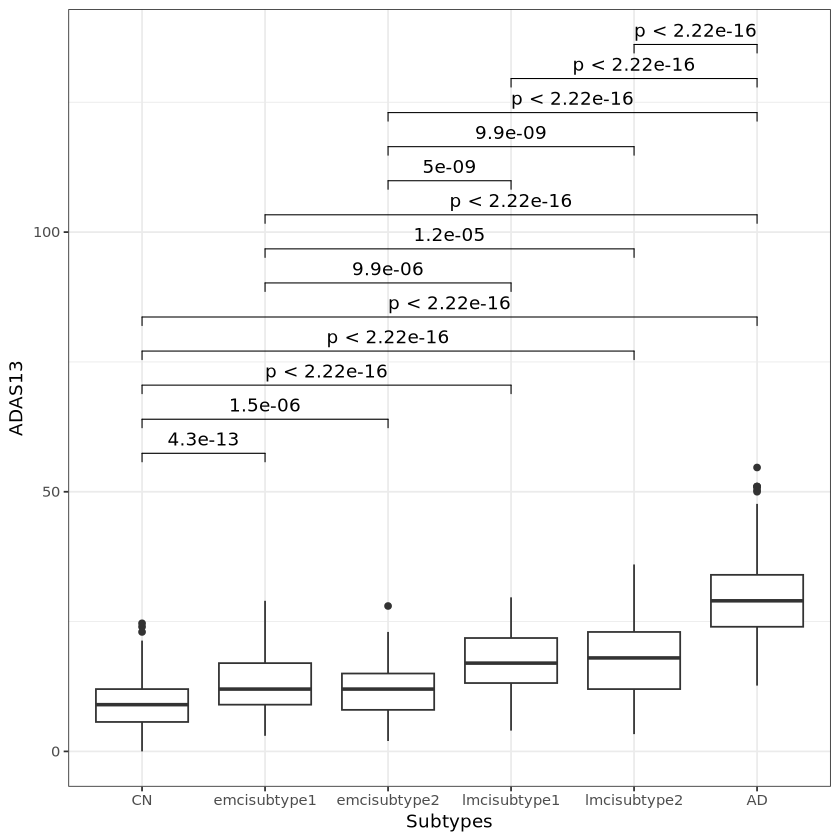

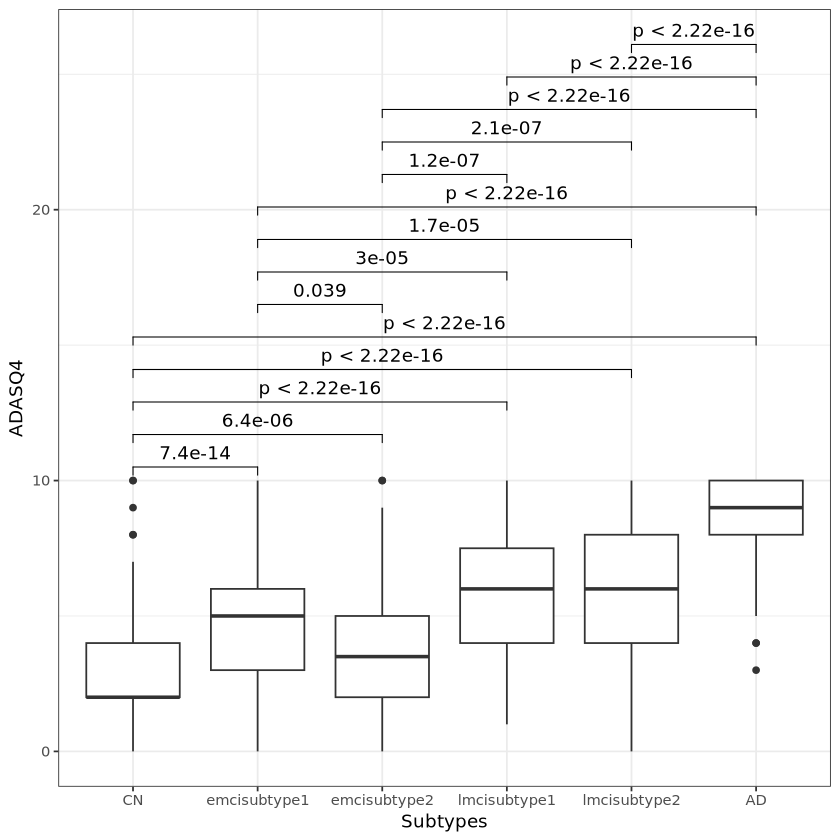

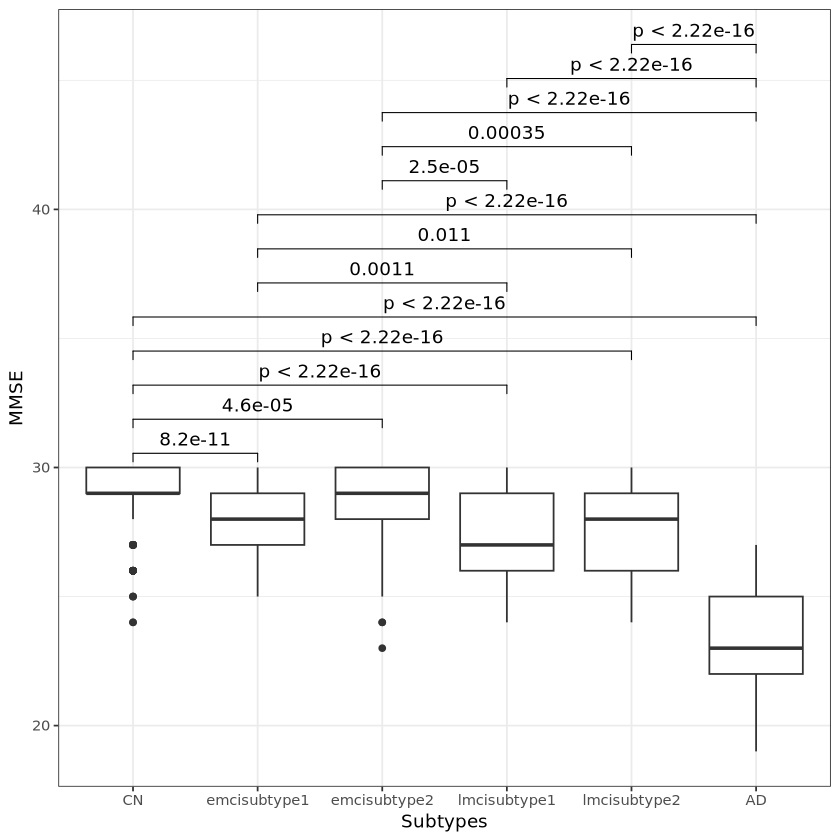

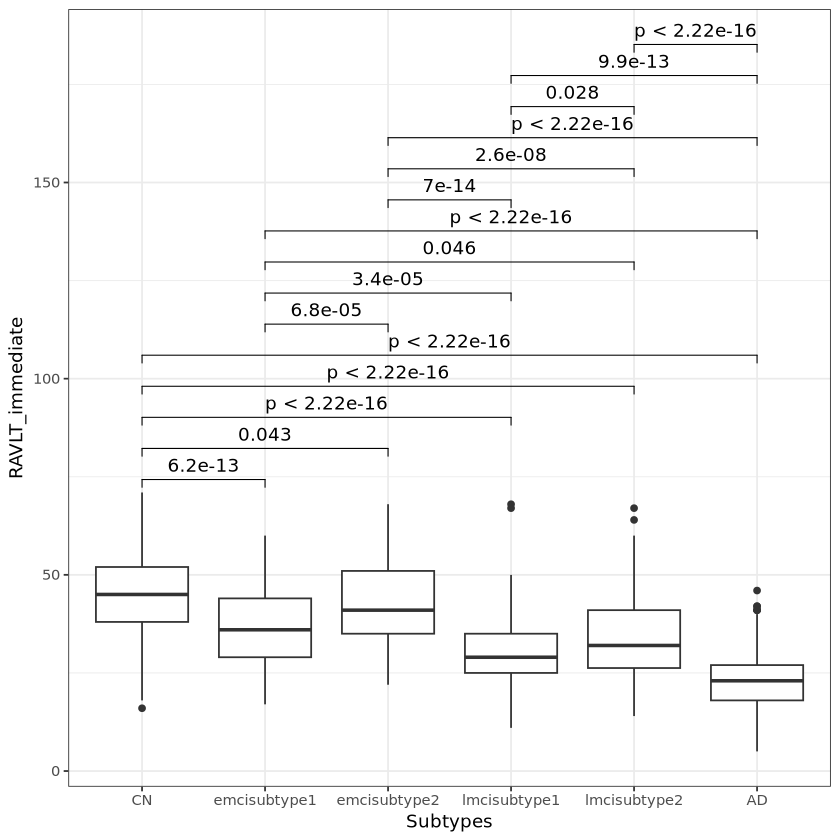

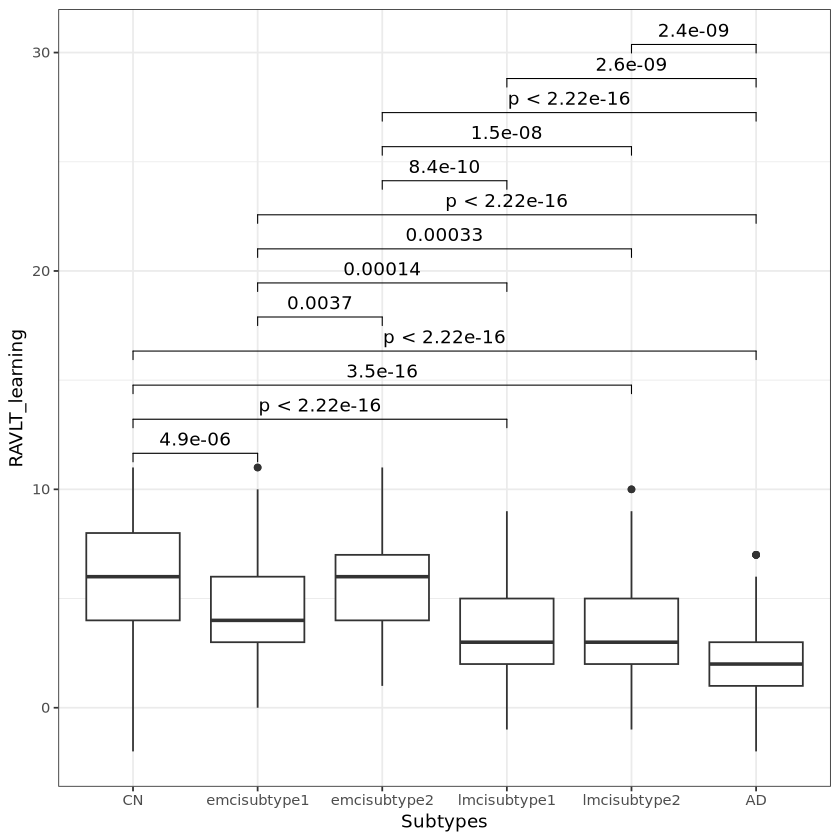

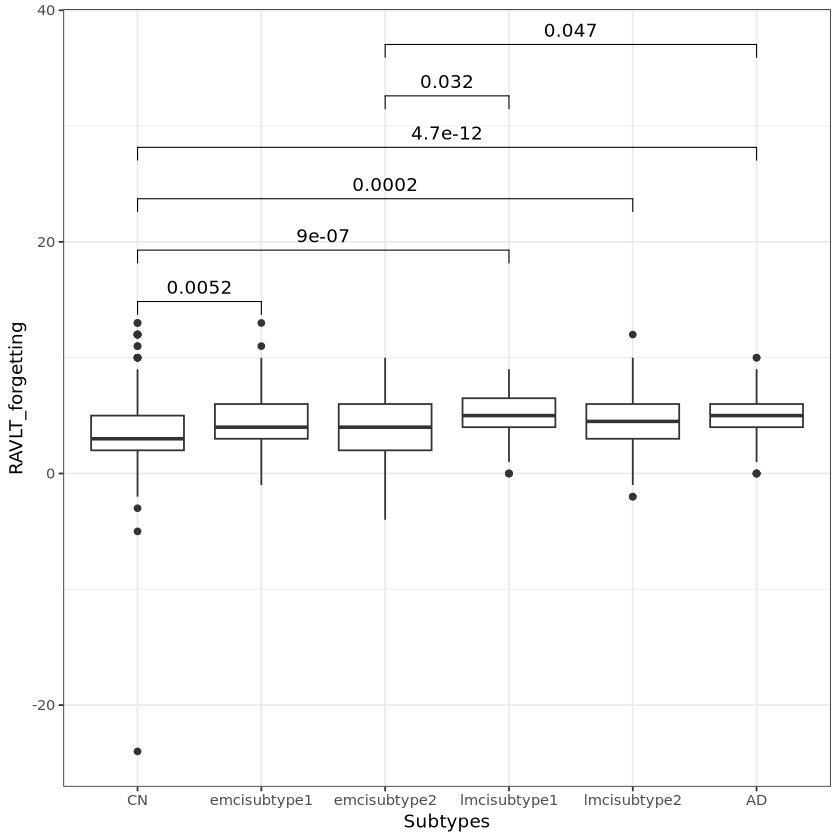

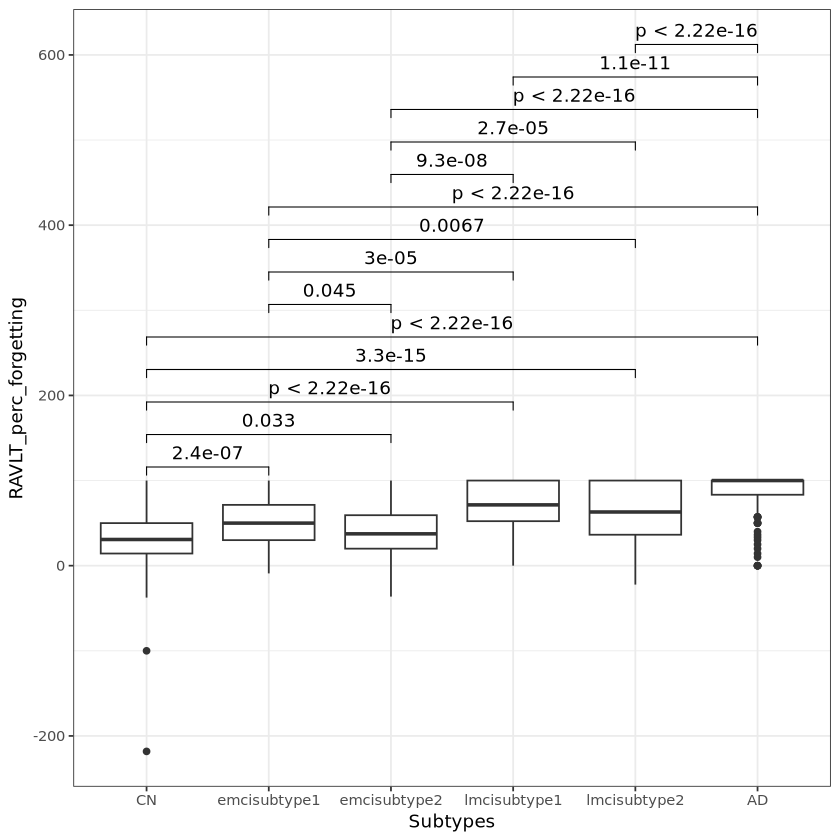

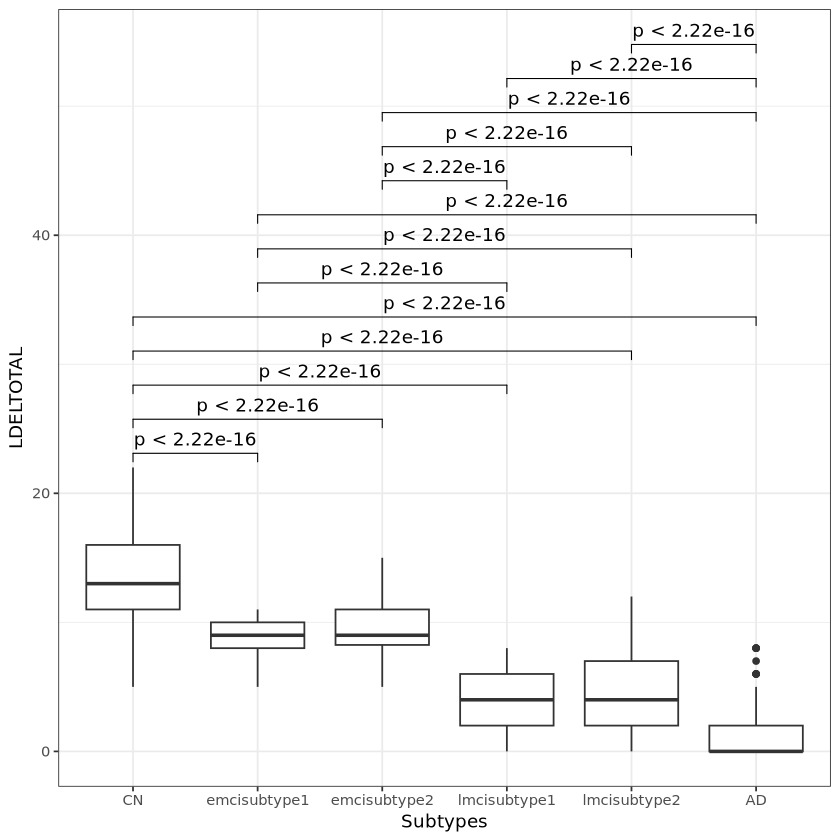

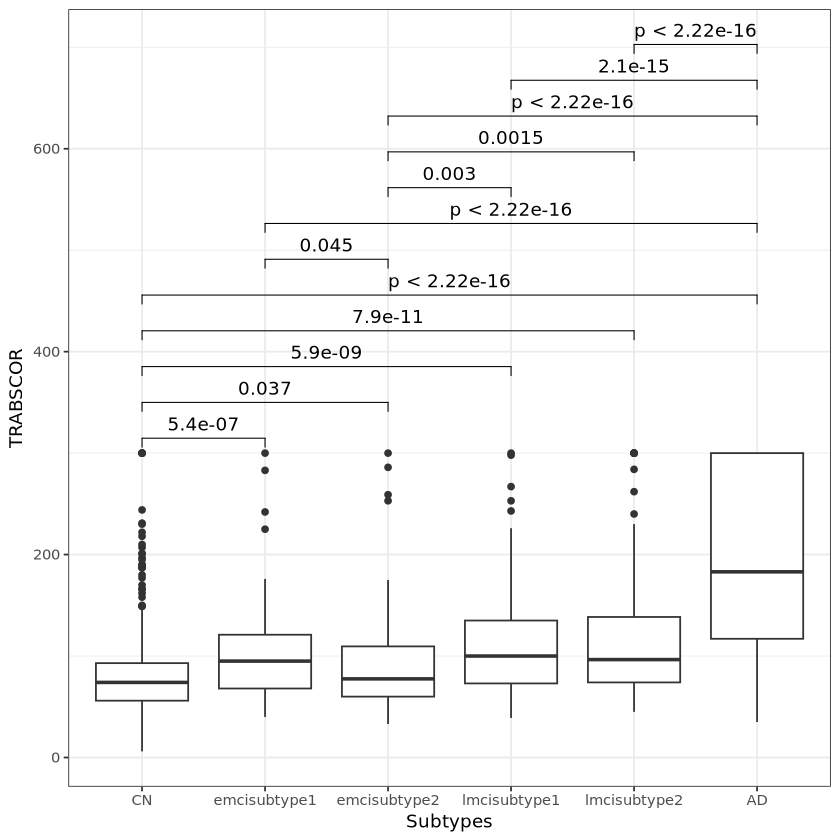

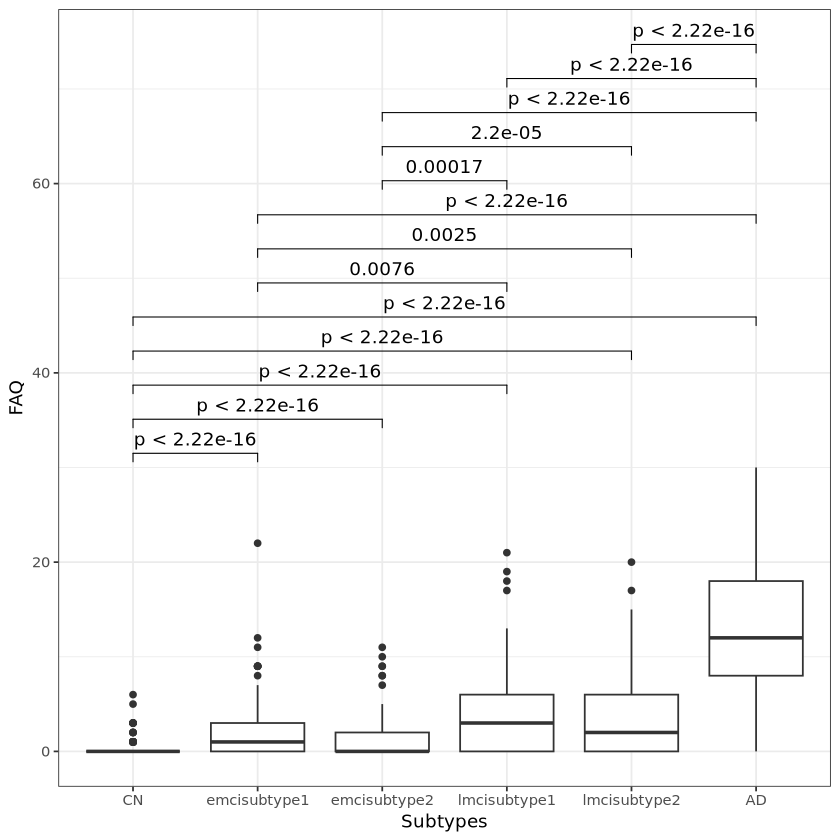

In [12]:

cog <- c('CDRSB','ADAS11','ADAS13','ADASQ4','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting','LDELTOTAL','TRABSCOR','FAQ')

clinical2 <- clinical[complete.cases(clinical[,cog]), ]

clinical2[["SNF"]]<-factor(clinical2[["SNF"]],levels= c("CN","emcisubtype1","emcisubtype2","lmcisubtype1","lmcisubtype2","AD"))

levs<-levels(clinical2[["SNF"]])
pair<-combn(levs,2,simplify=FALSE)


library(ggplot2)
library(ggpubr)

for(v in cog){
  sig <- list()
  for(p in pair){
    d  <- clinical2[clinical2$SNF %in% p, ]
    pv <- wilcox.test(d[[v]] ~ d$SNF)$p.value
    if(!is.na(pv) && pv < 0.05) sig <- c(sig, list(p))
  }
  p <- ggplot(clinical2, aes(x = SNF, y = .data[[v]])) +
        geom_boxplot() +
        xlab("Subtypes") +
        theme_bw()
  if(length(sig)) p <- p + stat_compare_means(comparisons = sig, method = "wilcox.test")
  ggsave(file.path("cog_score_boxplots",paste0(v,".png")),p, width=6,height=4,dpi=300)
  print(p)
}
